In [2]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")

dj.blob.use_32bit_dims = True  # necessary for pd.blob read

import behav_viz.ingest as ingest
import behav_viz.visualize as viz
import behav_viz.utils as utils
FIGURES_PATH = utils.dir_utils.get_figures_path("rats", "alpha")

from config_alpha_experiment import *

# settings
%load_ext autoreload
%autoreload 2

[2024-07-30 16:49:21,478][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-07-30 16:49:22,857][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


# Session 6 

In [18]:
ALPHA_2_SESSION_6 = list(set(ALPHA_2_ANIMALS) & set(ALPHA_SESSION_6))
MIN_DATE = get_start_date(group="alpha_1", type="str")

## Load in Trials & Days Data

In [19]:
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ALPHA_1_ANIMALS + ALPHA_2_SESSION_6, date_min=MIN_DATE
)

animal_id R040
Fetched 11 dates from Sessions table from 2024-07-20 to 2024-07-30 for R040

animal_id R041
Fetched 11 dates from Sessions table from 2024-07-20 to 2024-07-30 for R041

animal_id R042
Fetched 11 dates from Sessions table from 2024-07-20 to 2024-07-30 for R042

animal_id R043
Fetched 11 dates from Sessions table from 2024-07-20 to 2024-07-30 for R043

animal_id R044
Fetched 10 dates from Sessions table from 2024-07-20 to 2024-07-30 for R044

animal_id R045
Fetched 10 dates from Sessions table from 2024-07-20 to 2024-07-30 for R045

animal_id R046
Fetched 11 dates from Sessions table from 2024-07-20 to 2024-07-30 for R046

animal_id R047
Fetched 11 dates from Sessions table from 2024-07-20 to 2024-07-30 for R047

animal_id R049
Fetched 2 dates from Sessions table from 2024-07-29 to 2024-07-30 for R049

animal_id R048
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 for R048

animal_id R051
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 f

In [20]:
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ALPHA_1_ANIMALS + ALPHA_2_SESSION_6, date_min=MIN_DATE, verbose=True
)

Fetched data from SessionAggDate table from 2024-07-20 to 2024-07-30  
	Last date on the database is 2024-07-30 but user is querying data 
	for 2024-07-31. Attempting to manually aggregate today's data.
No new data from today, 2024-07-31 to add to SessionAggDate.

100 daily summaries fetched for animals: 
['R040', 'R041', 'R042', 'R043', 'R044', 'R045', 'R046', 'R047', 'R049', 'R048', 'R051', 'R050']
between 2024-07-20 and 2024-07-30



---
# Alpha 1s
These animals started first and all run in session 6

## Plot over Days

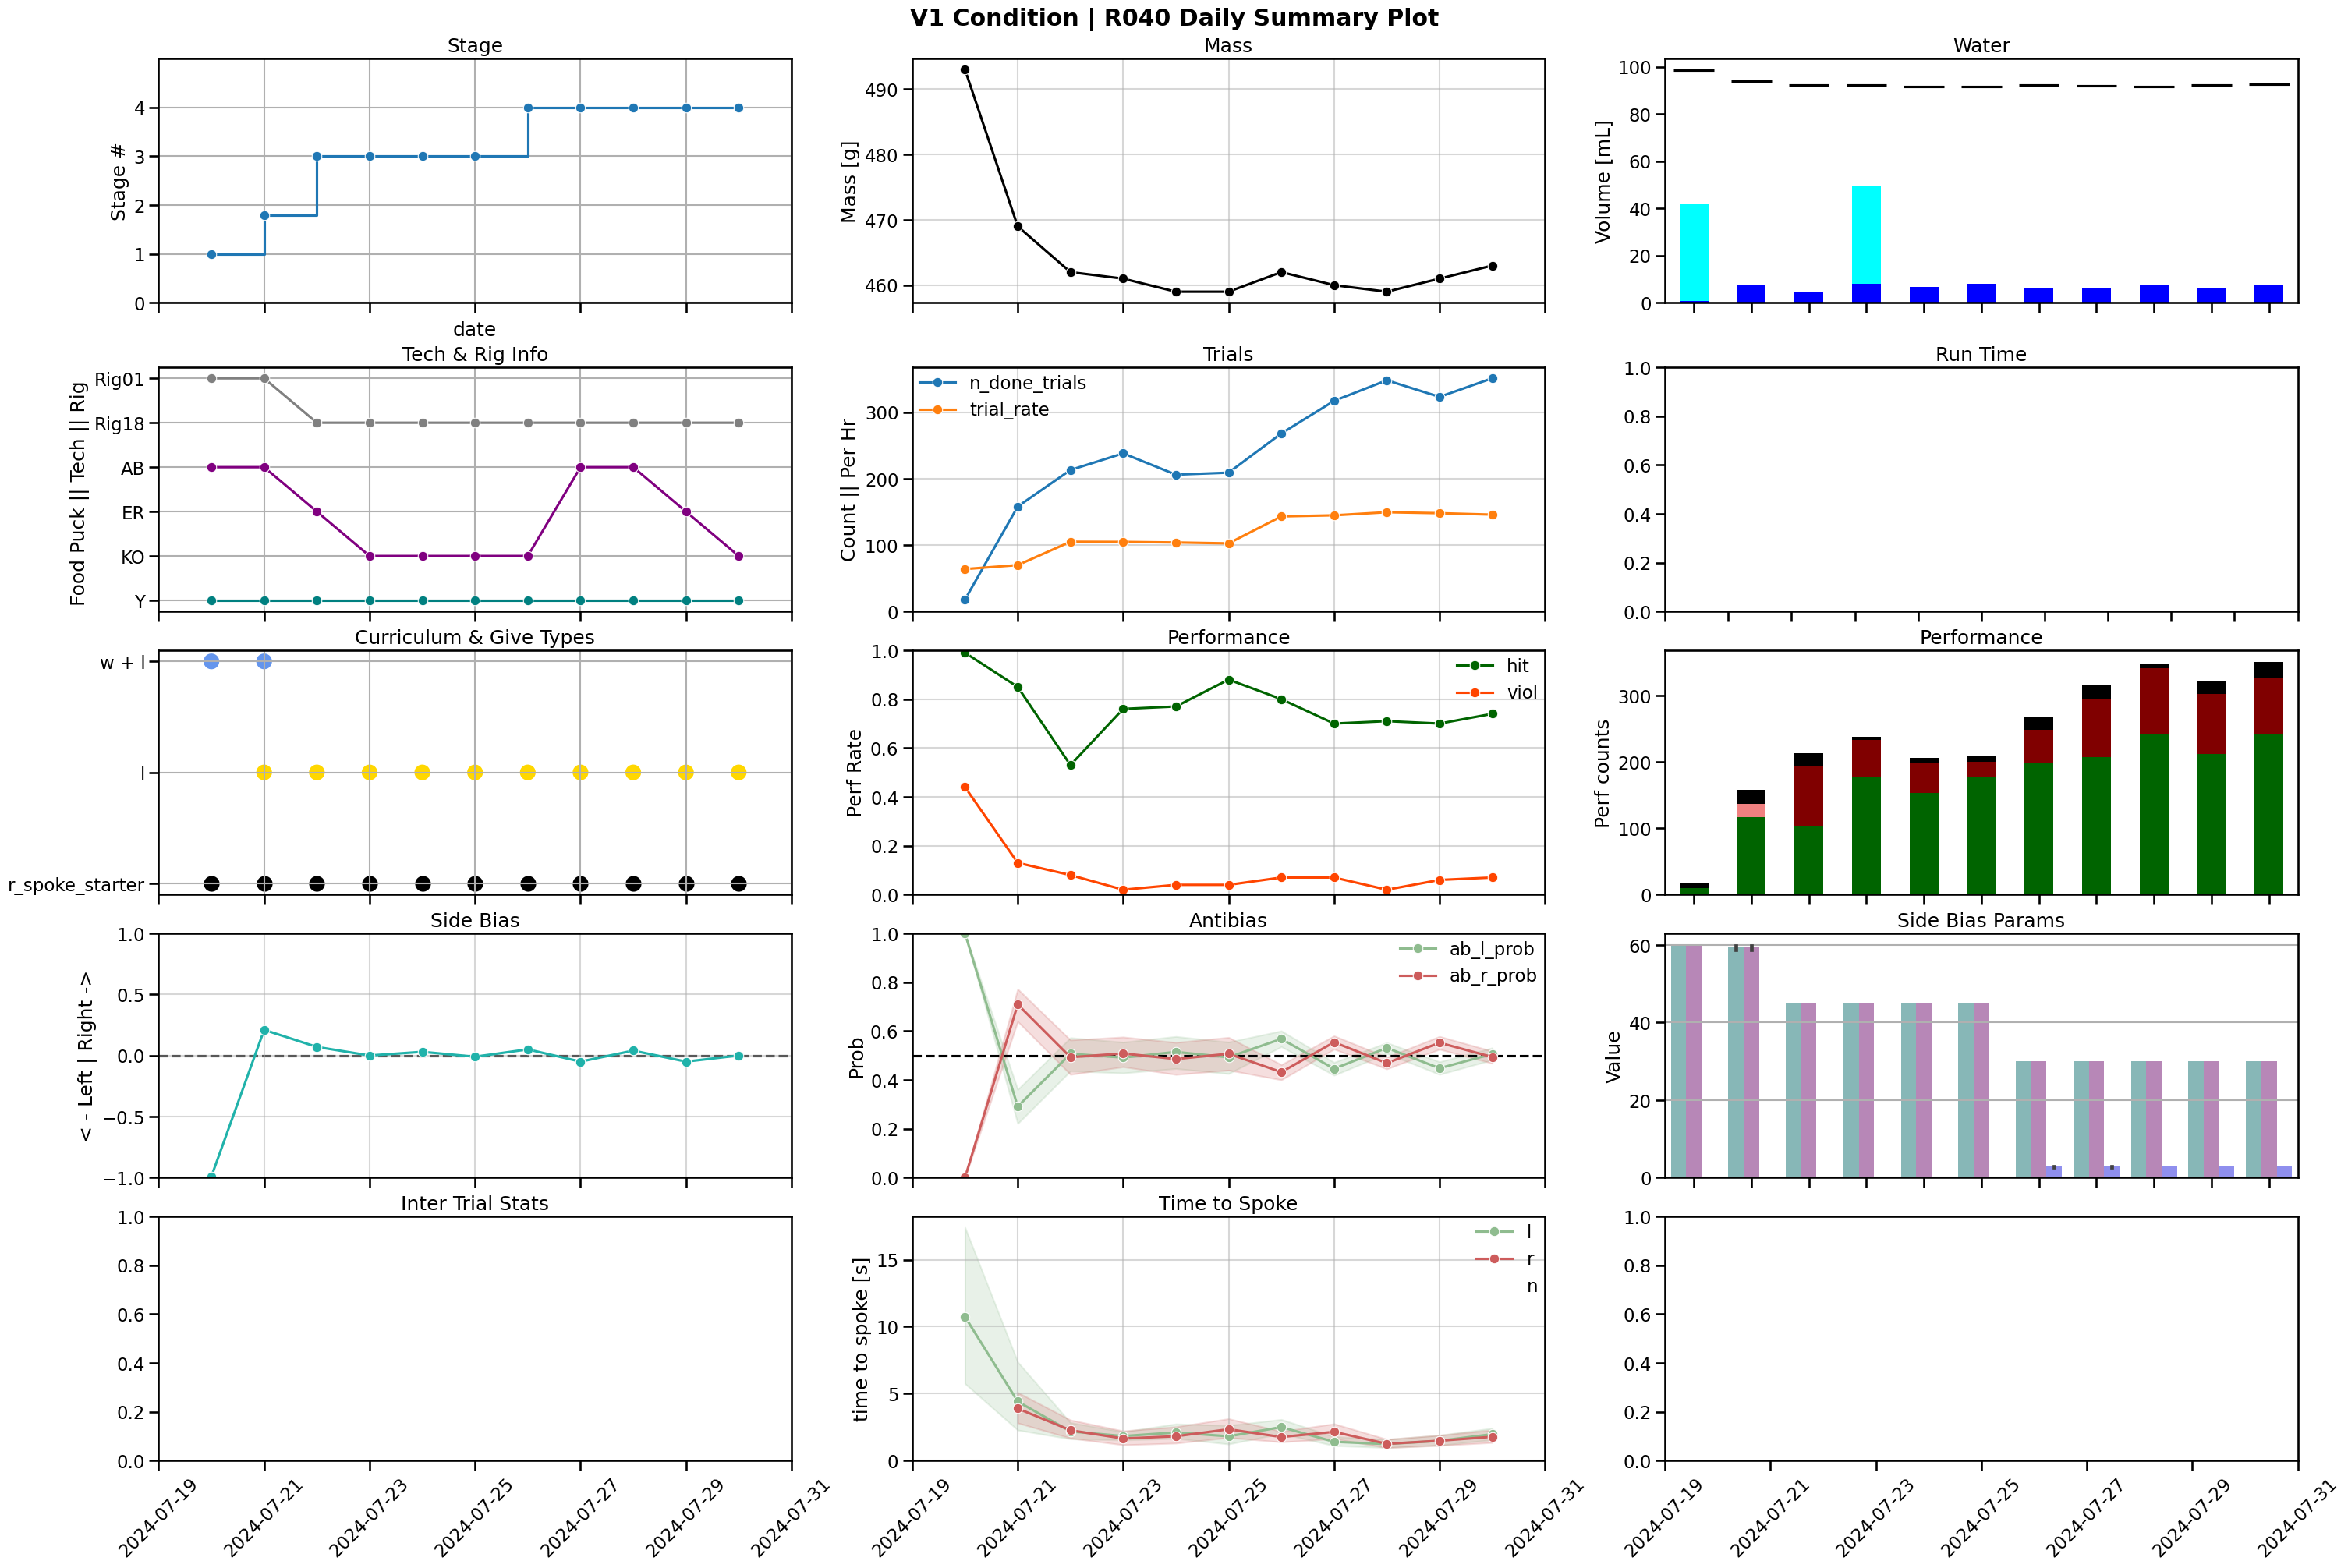

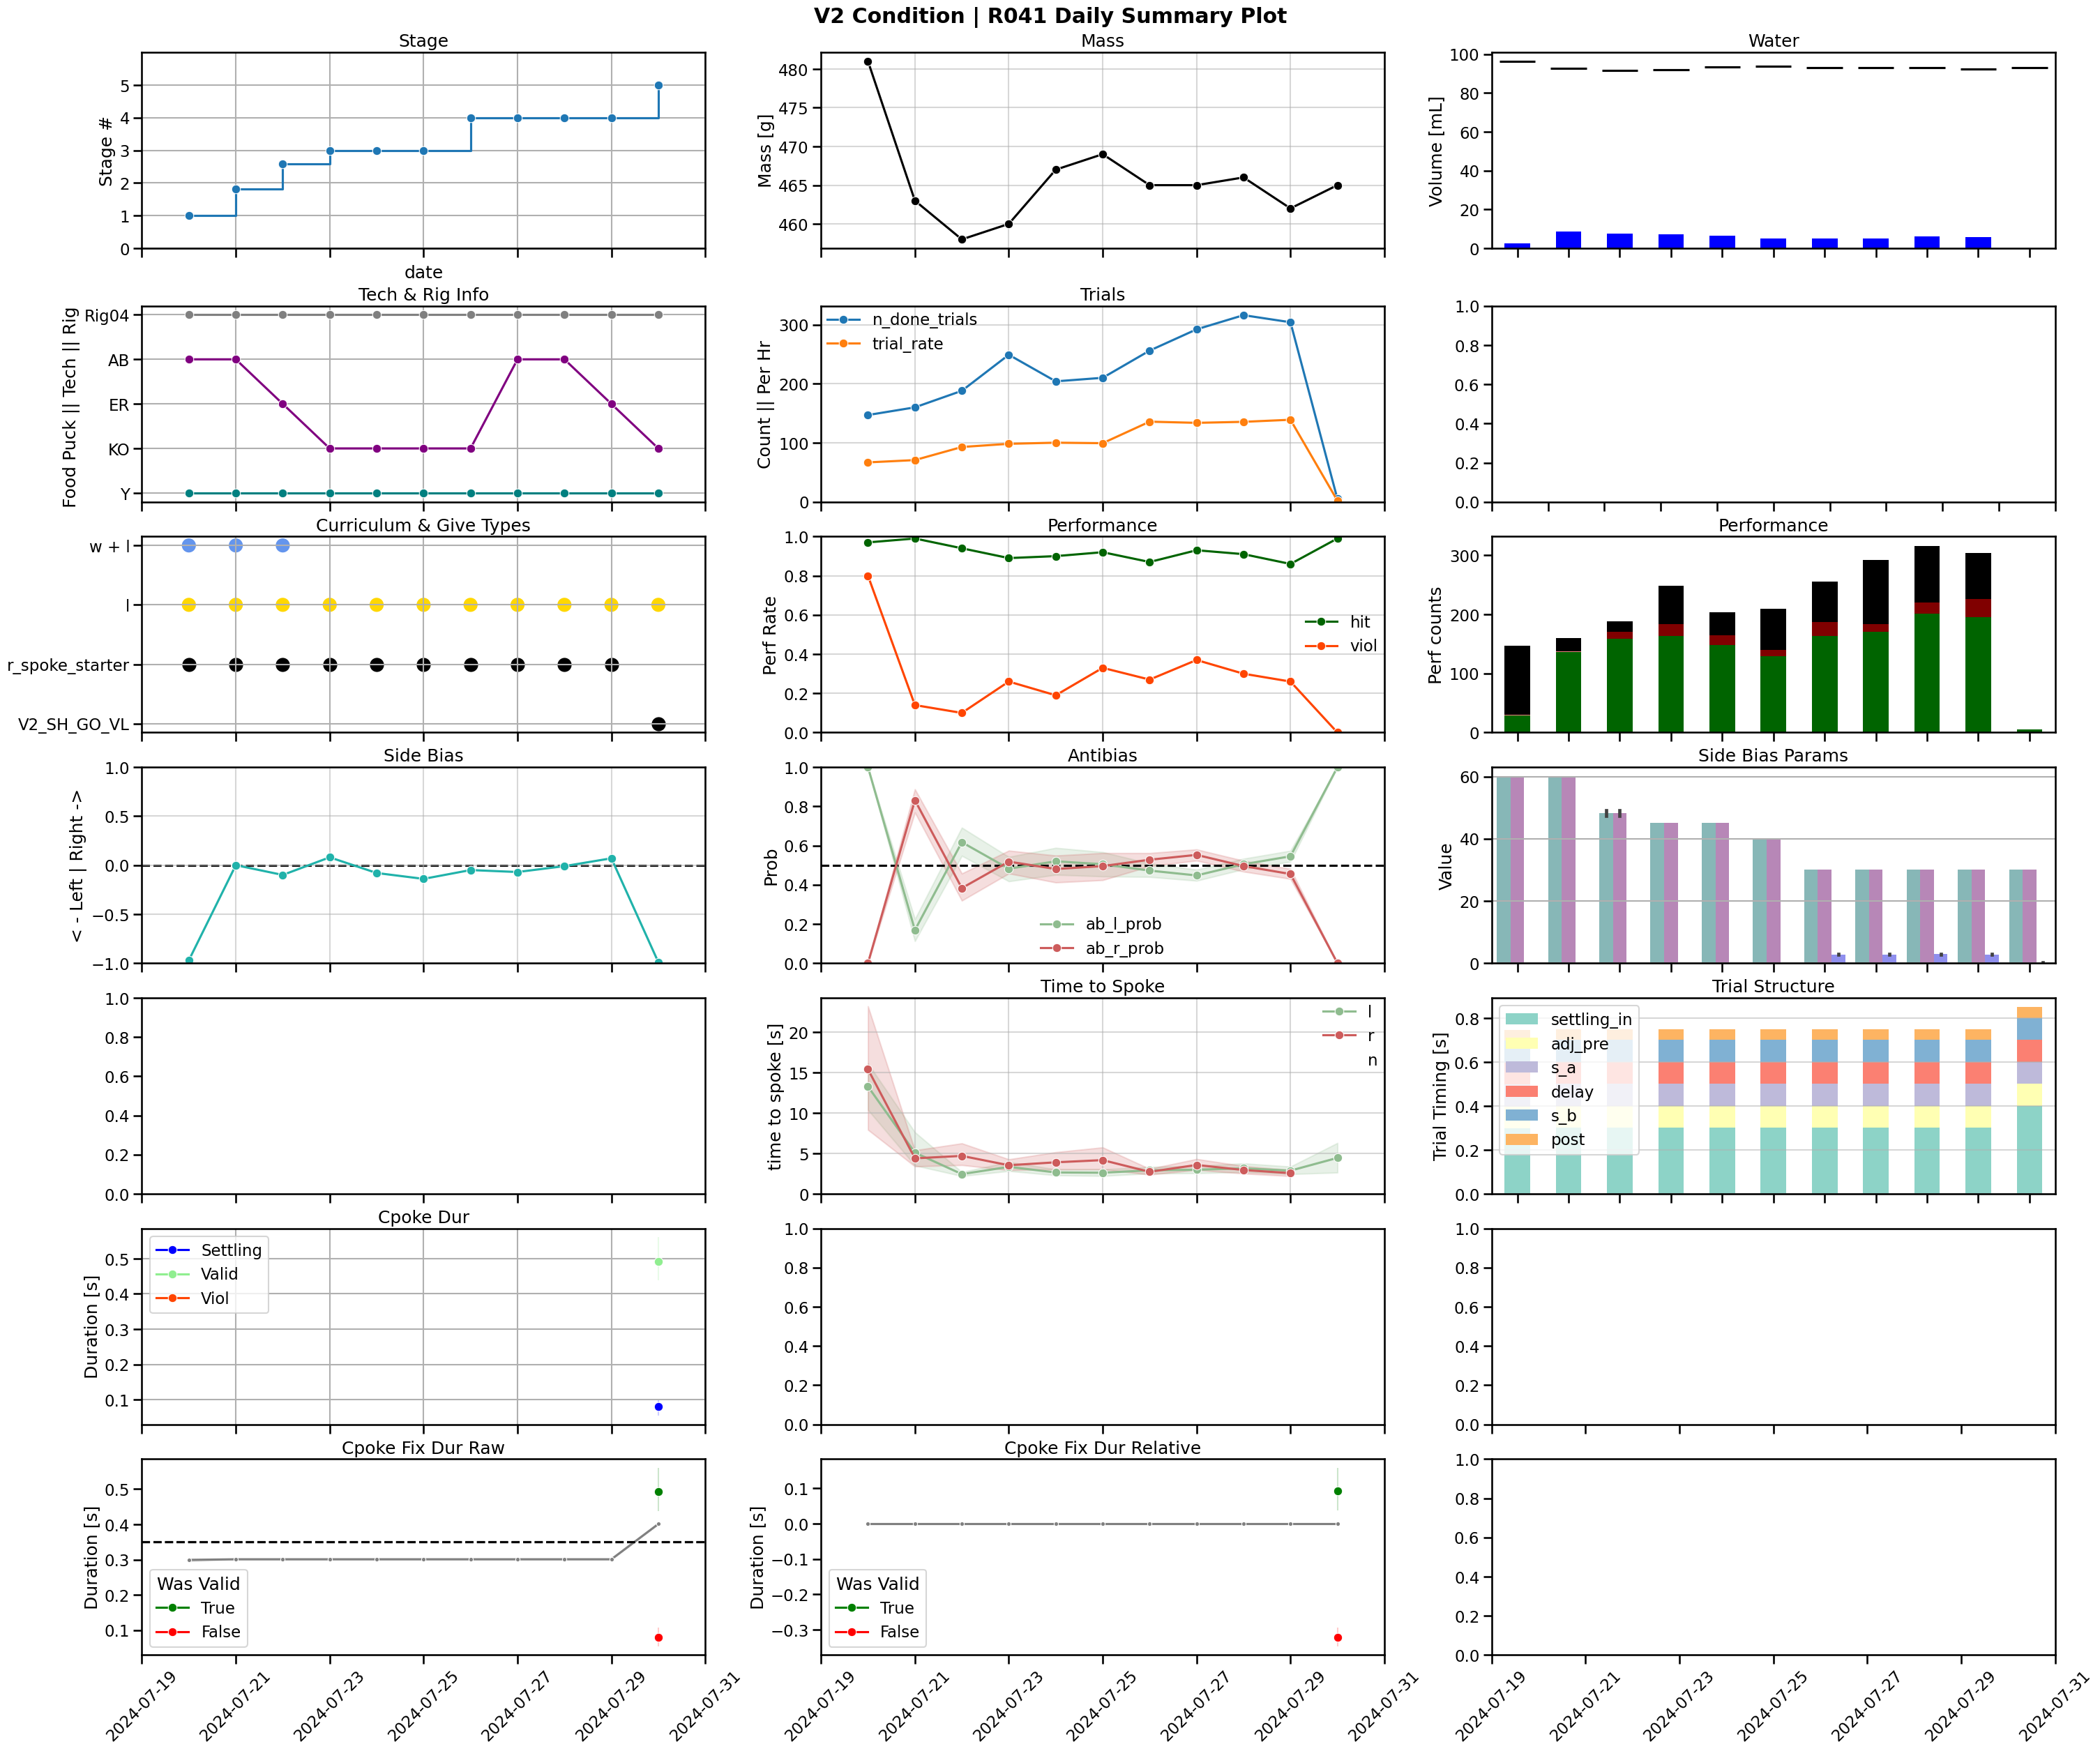

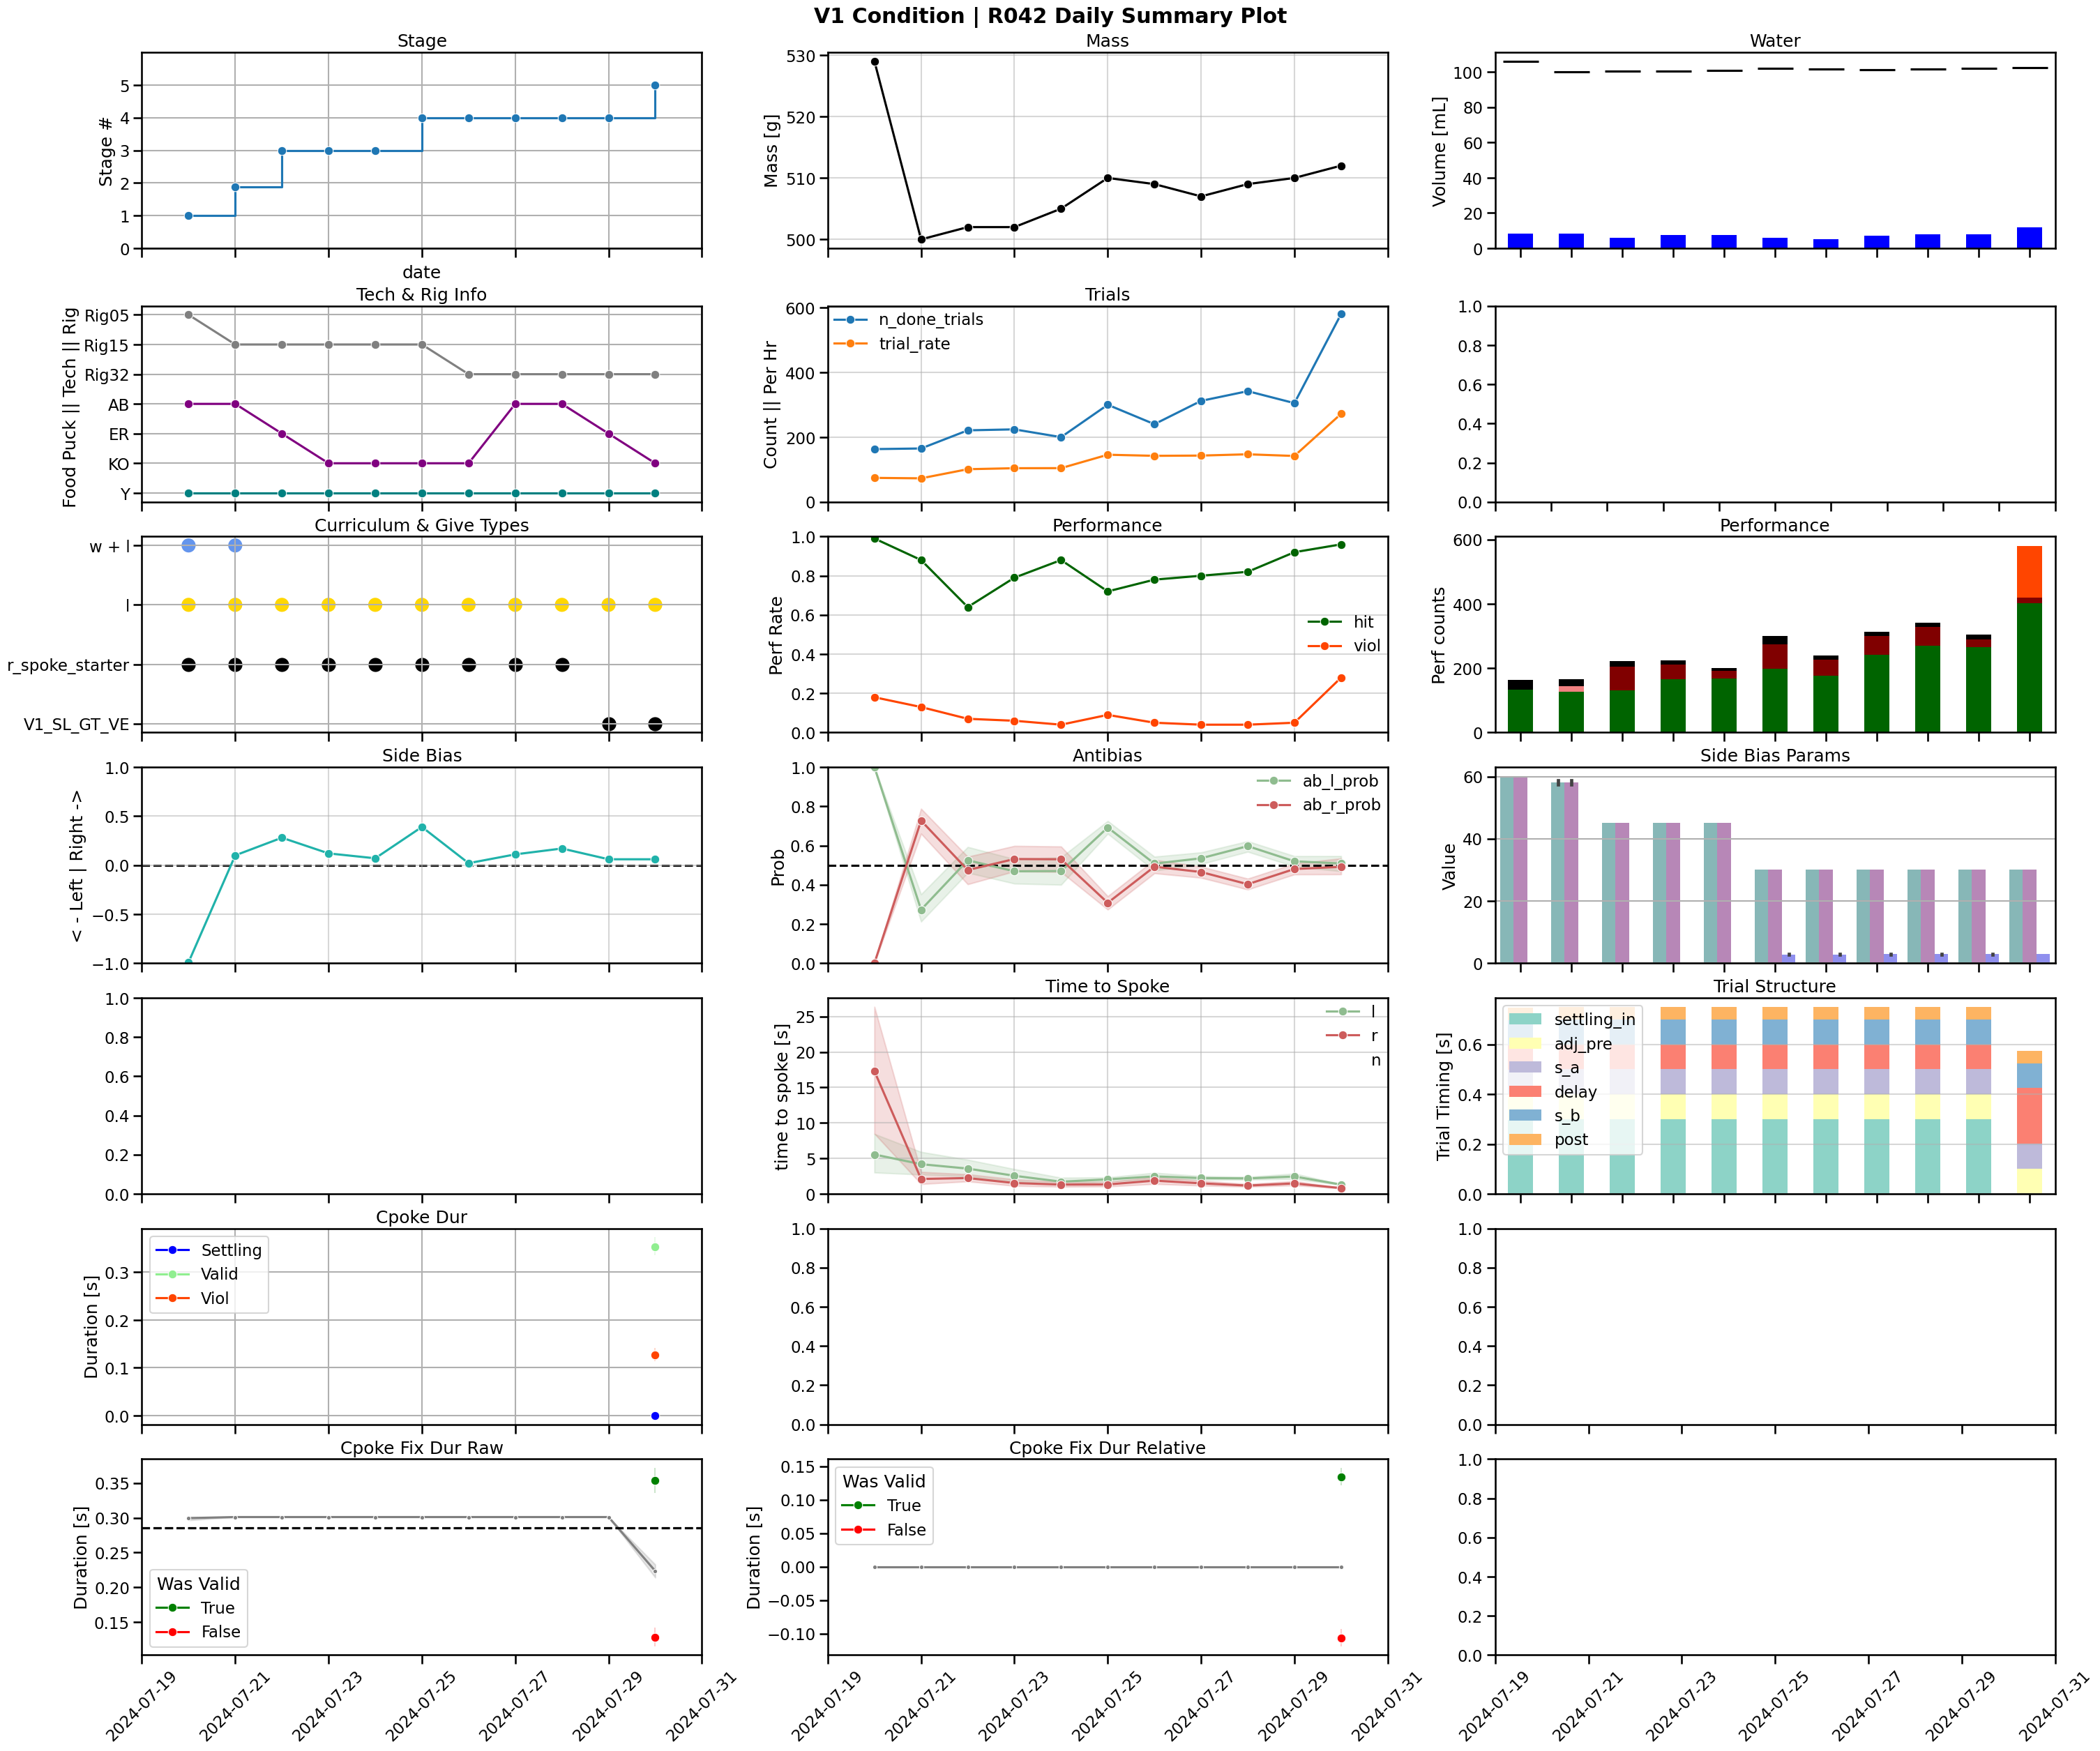

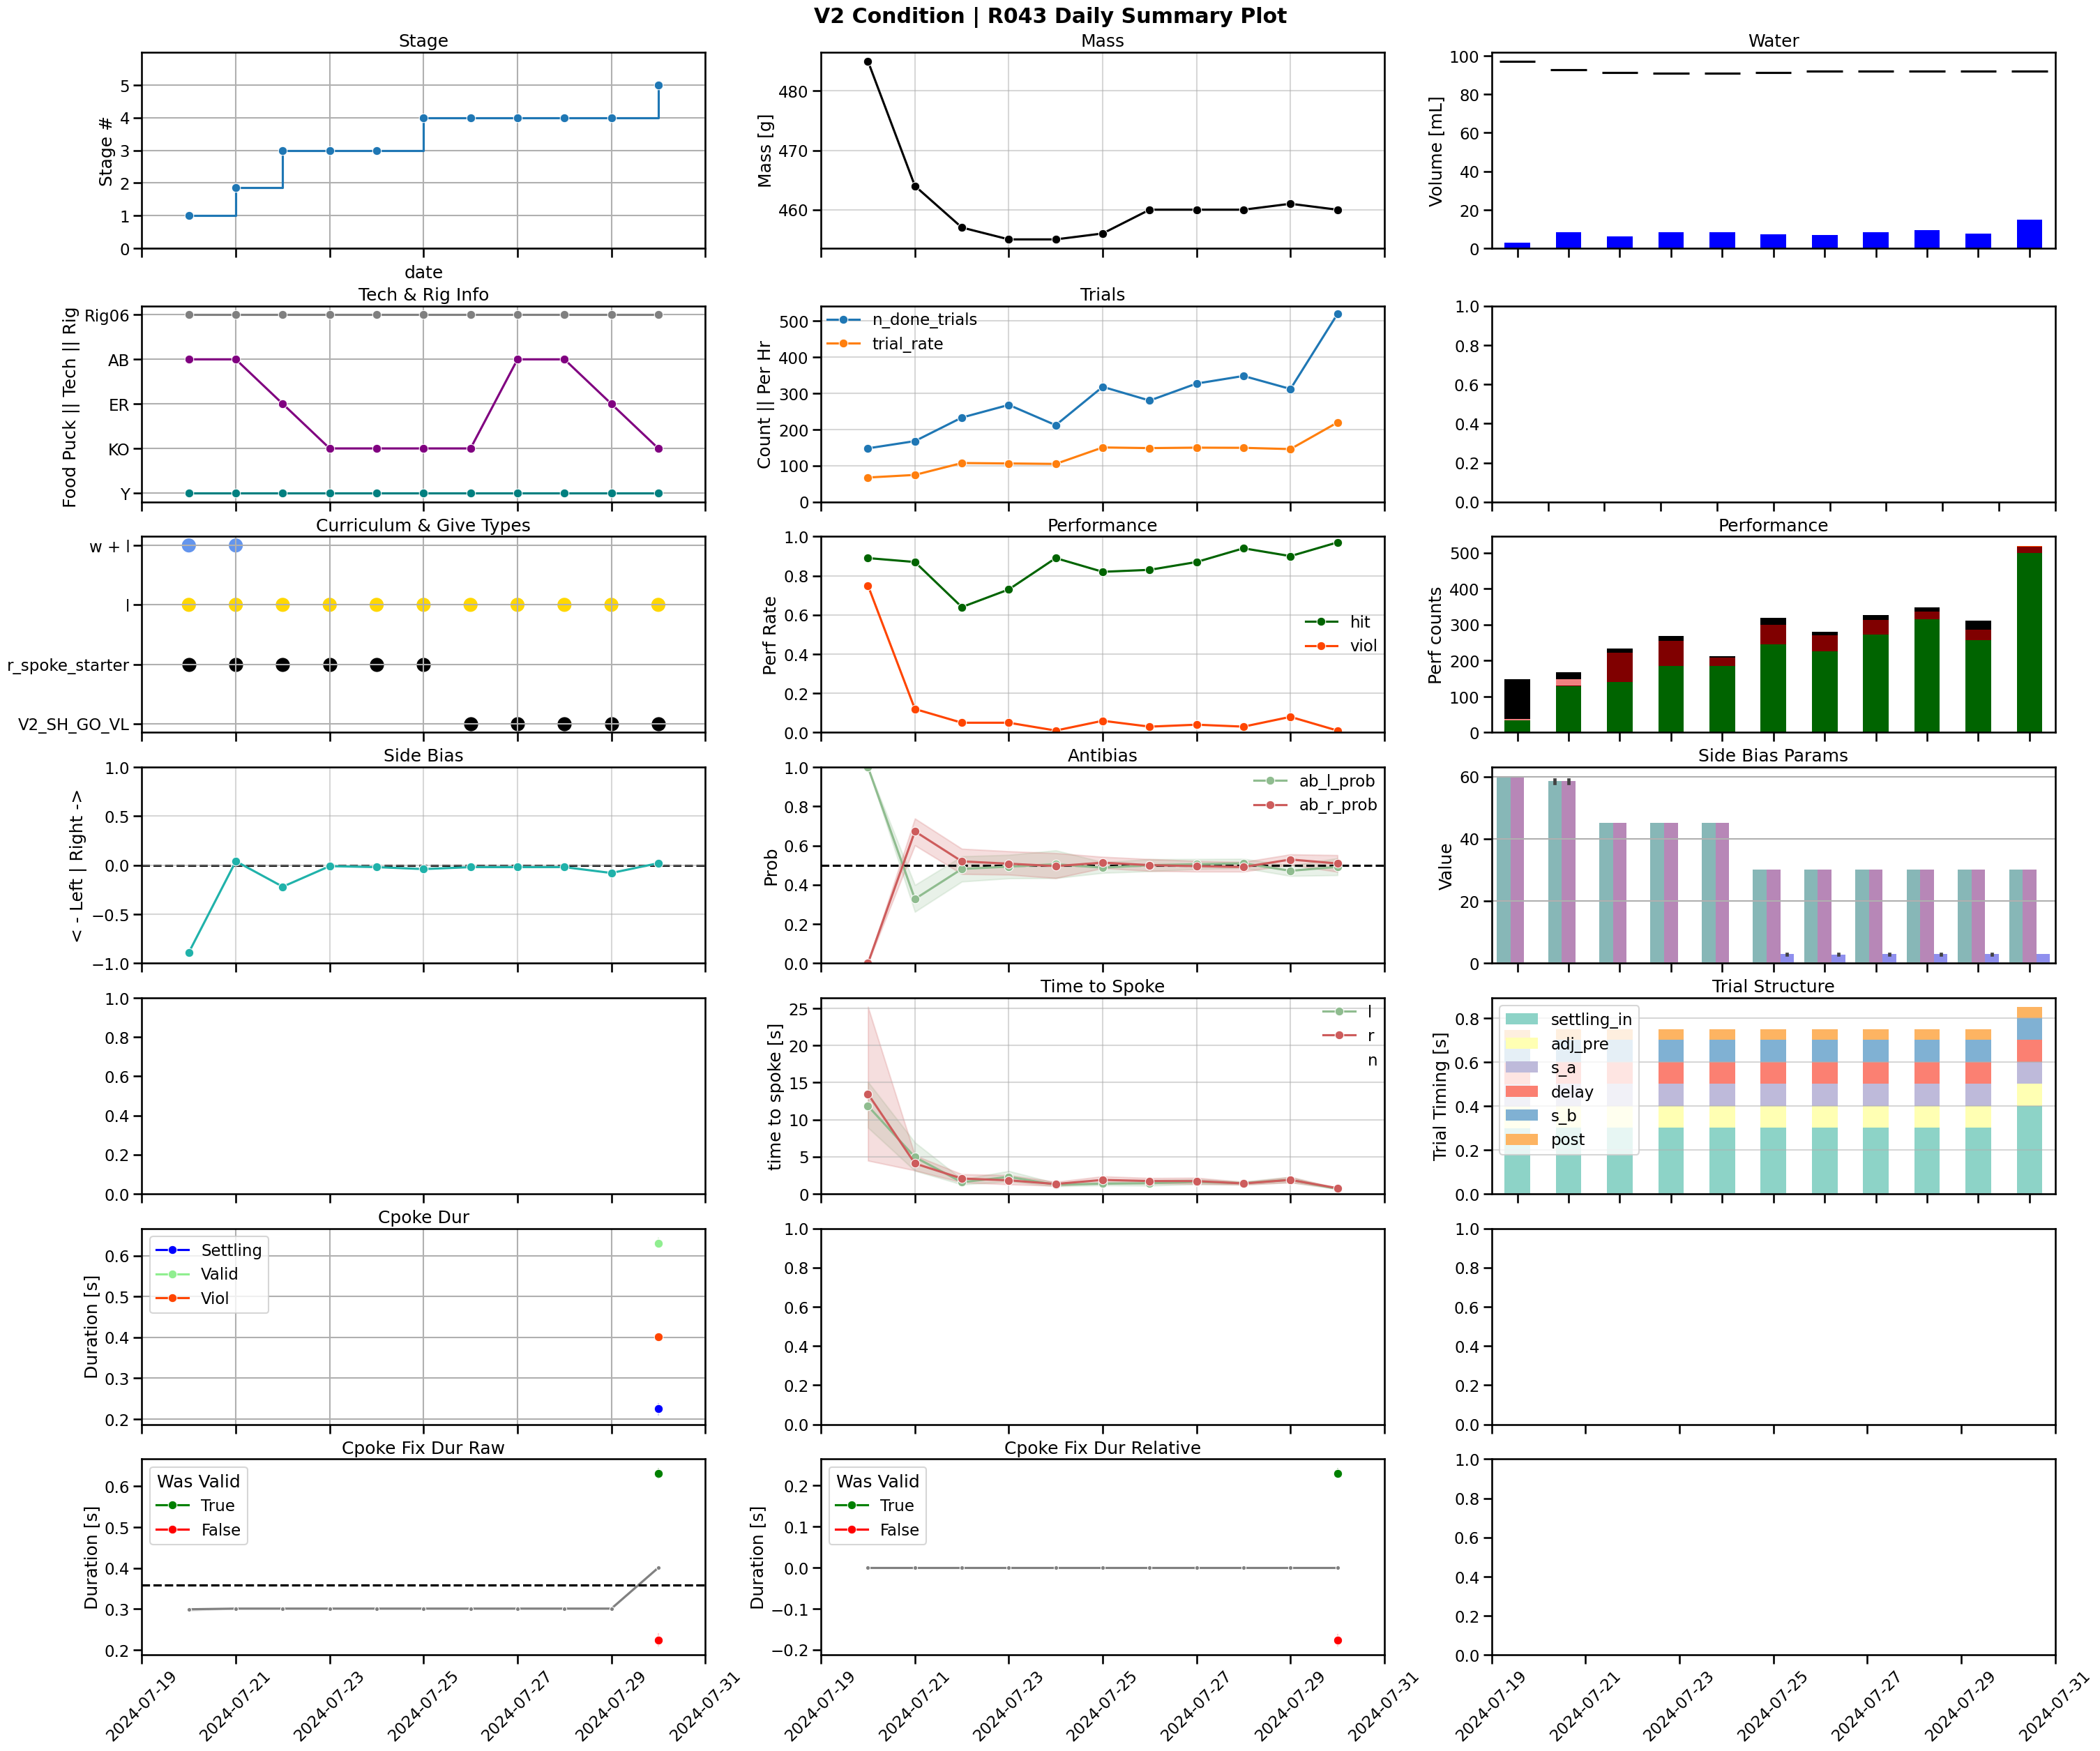

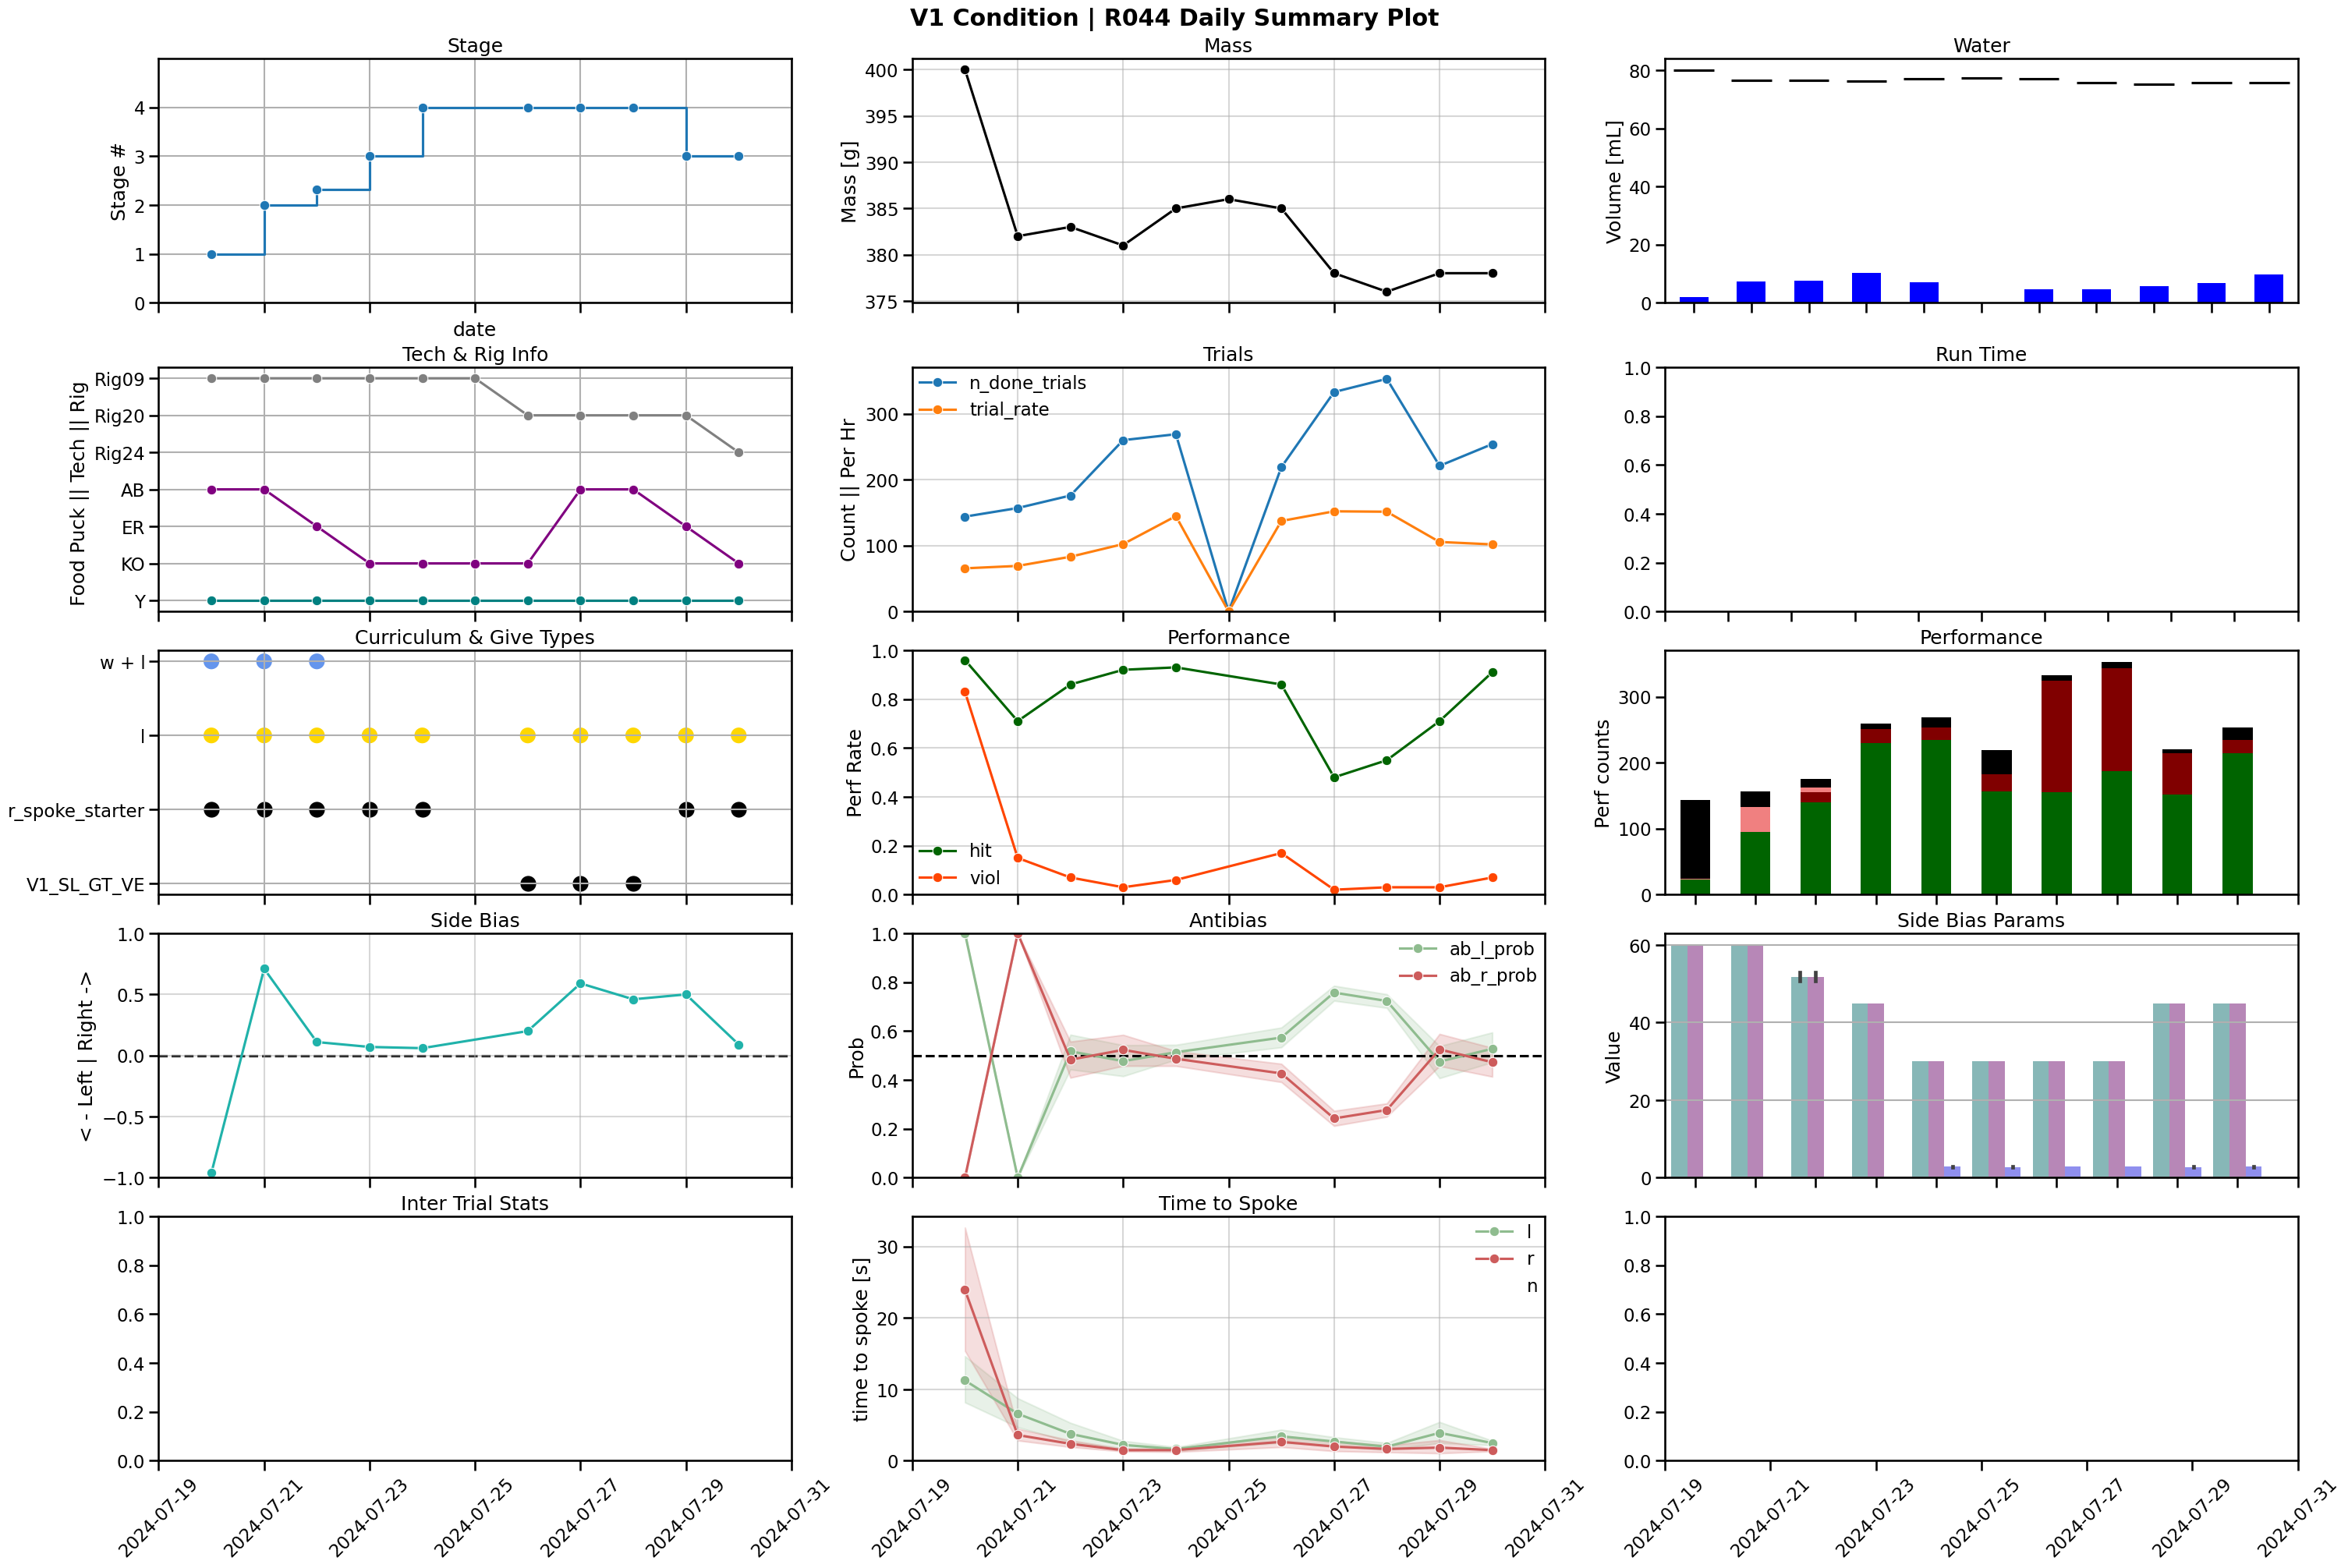

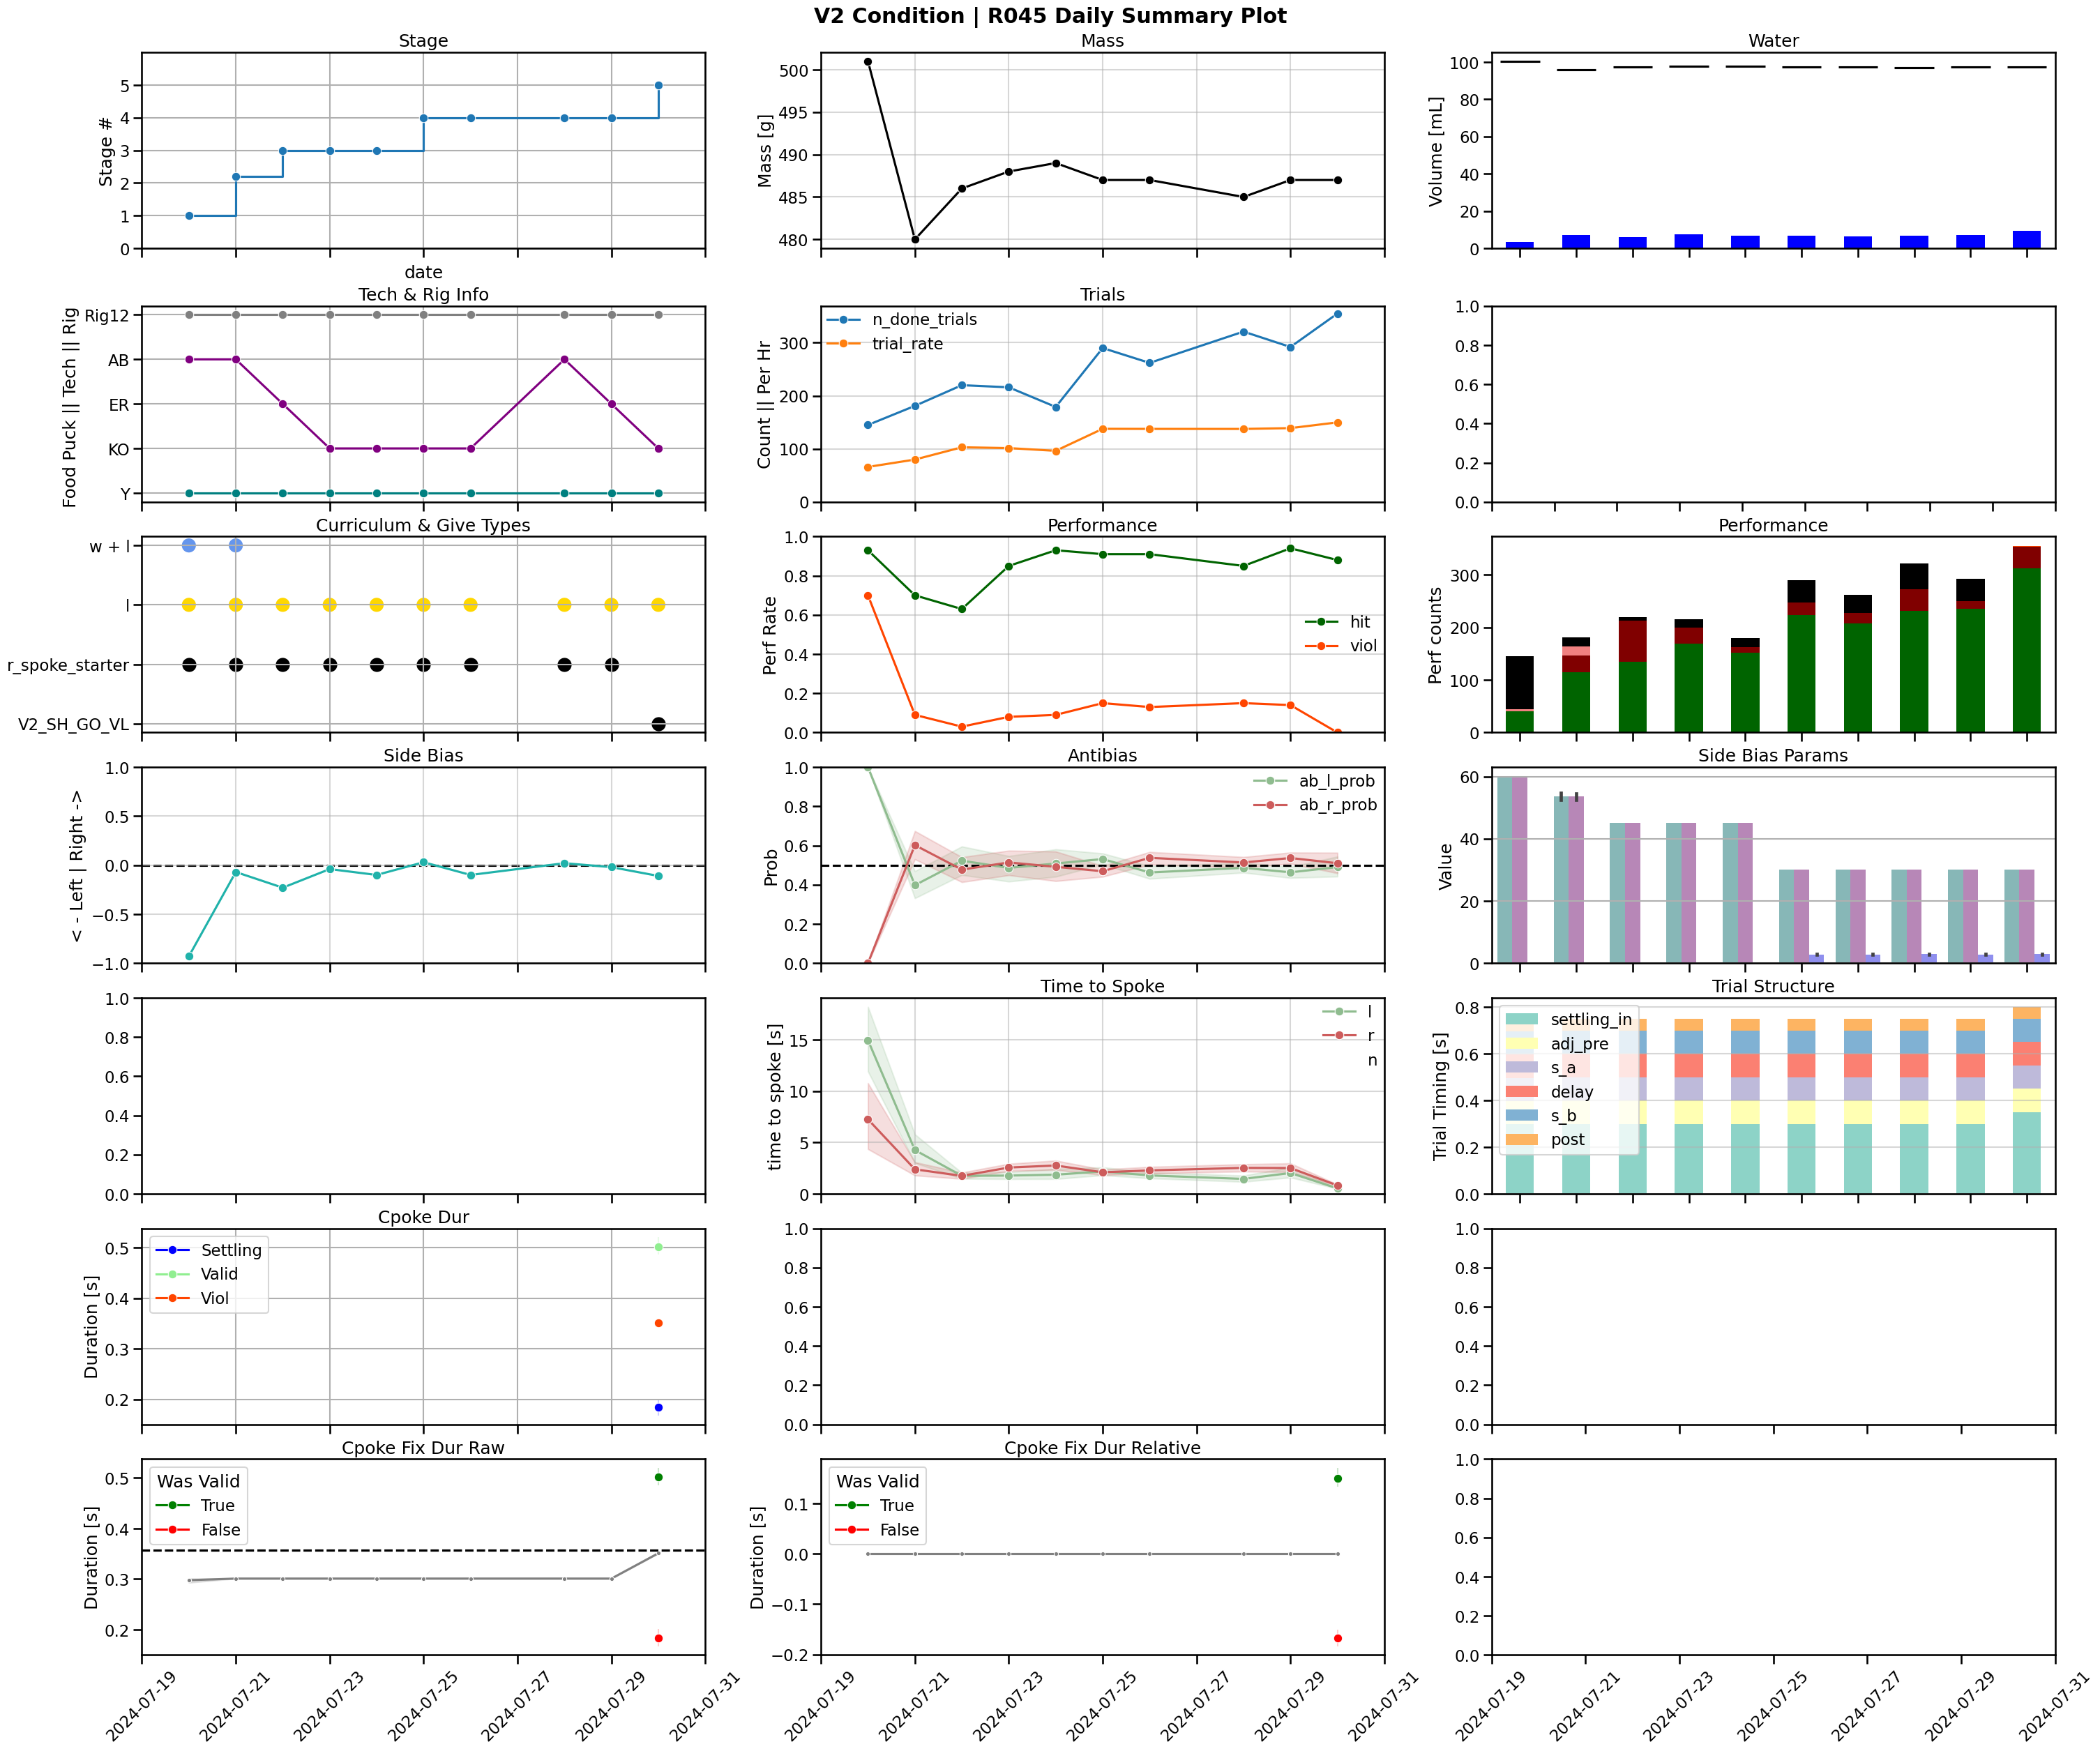

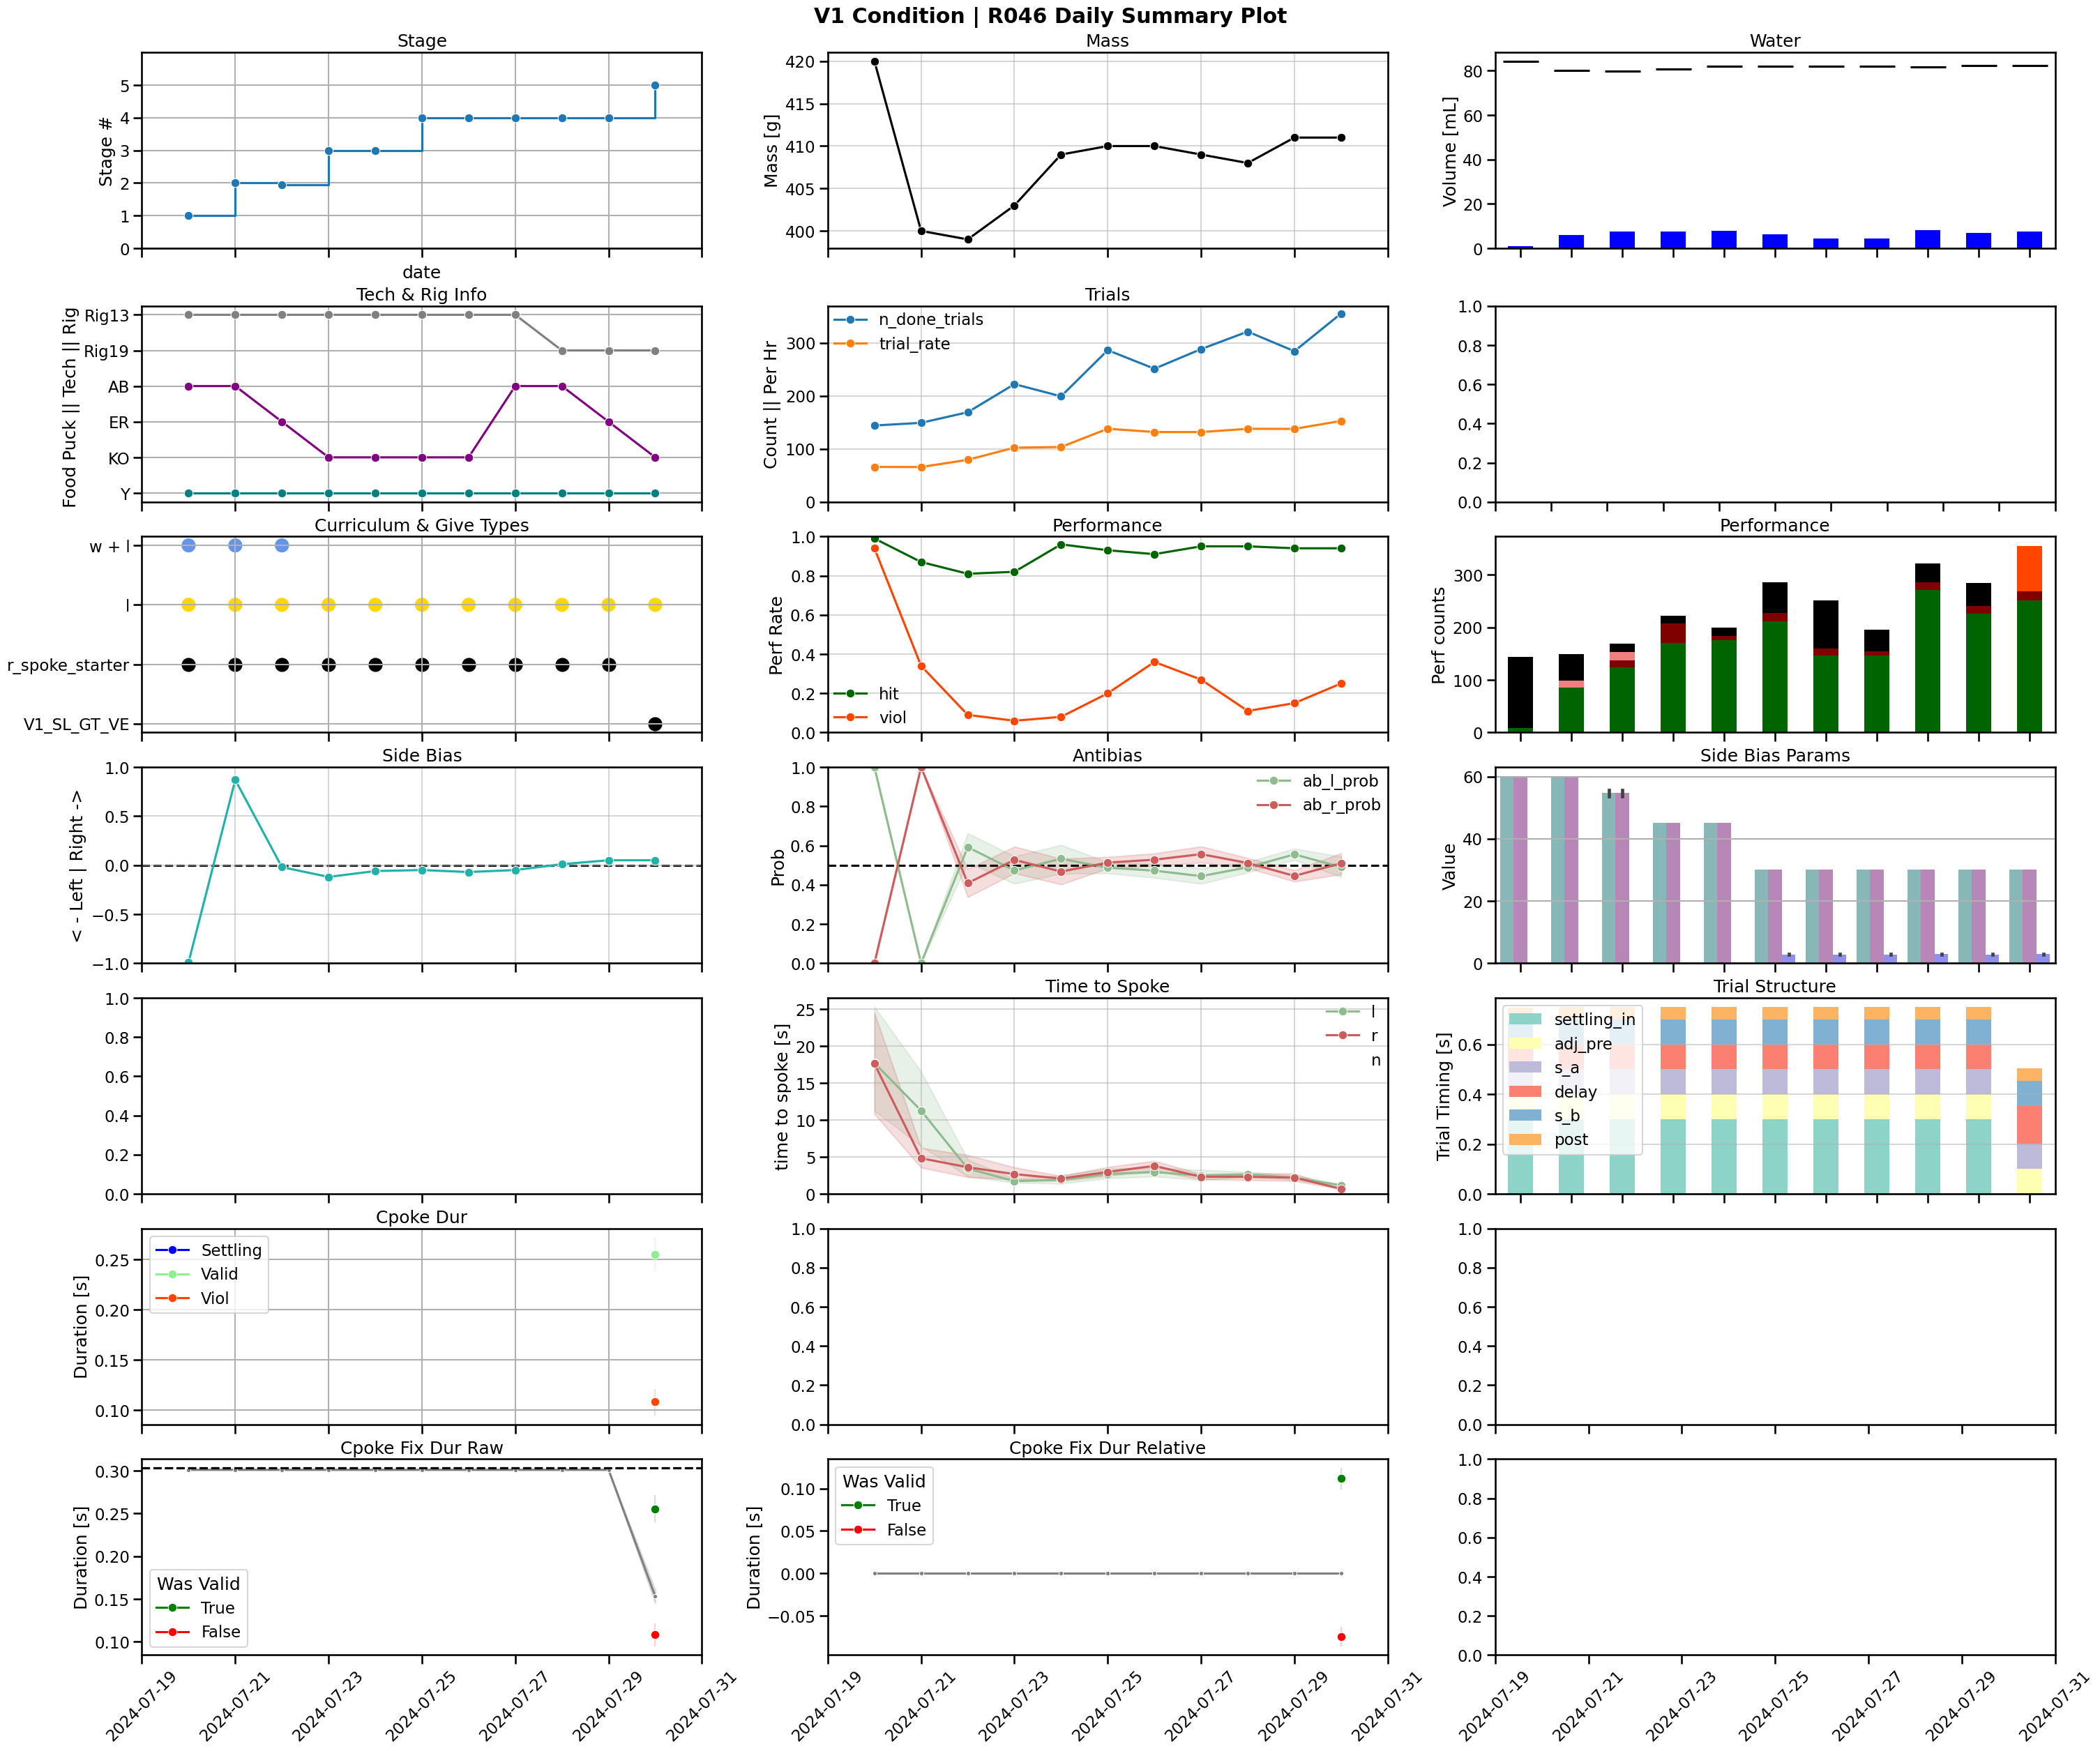

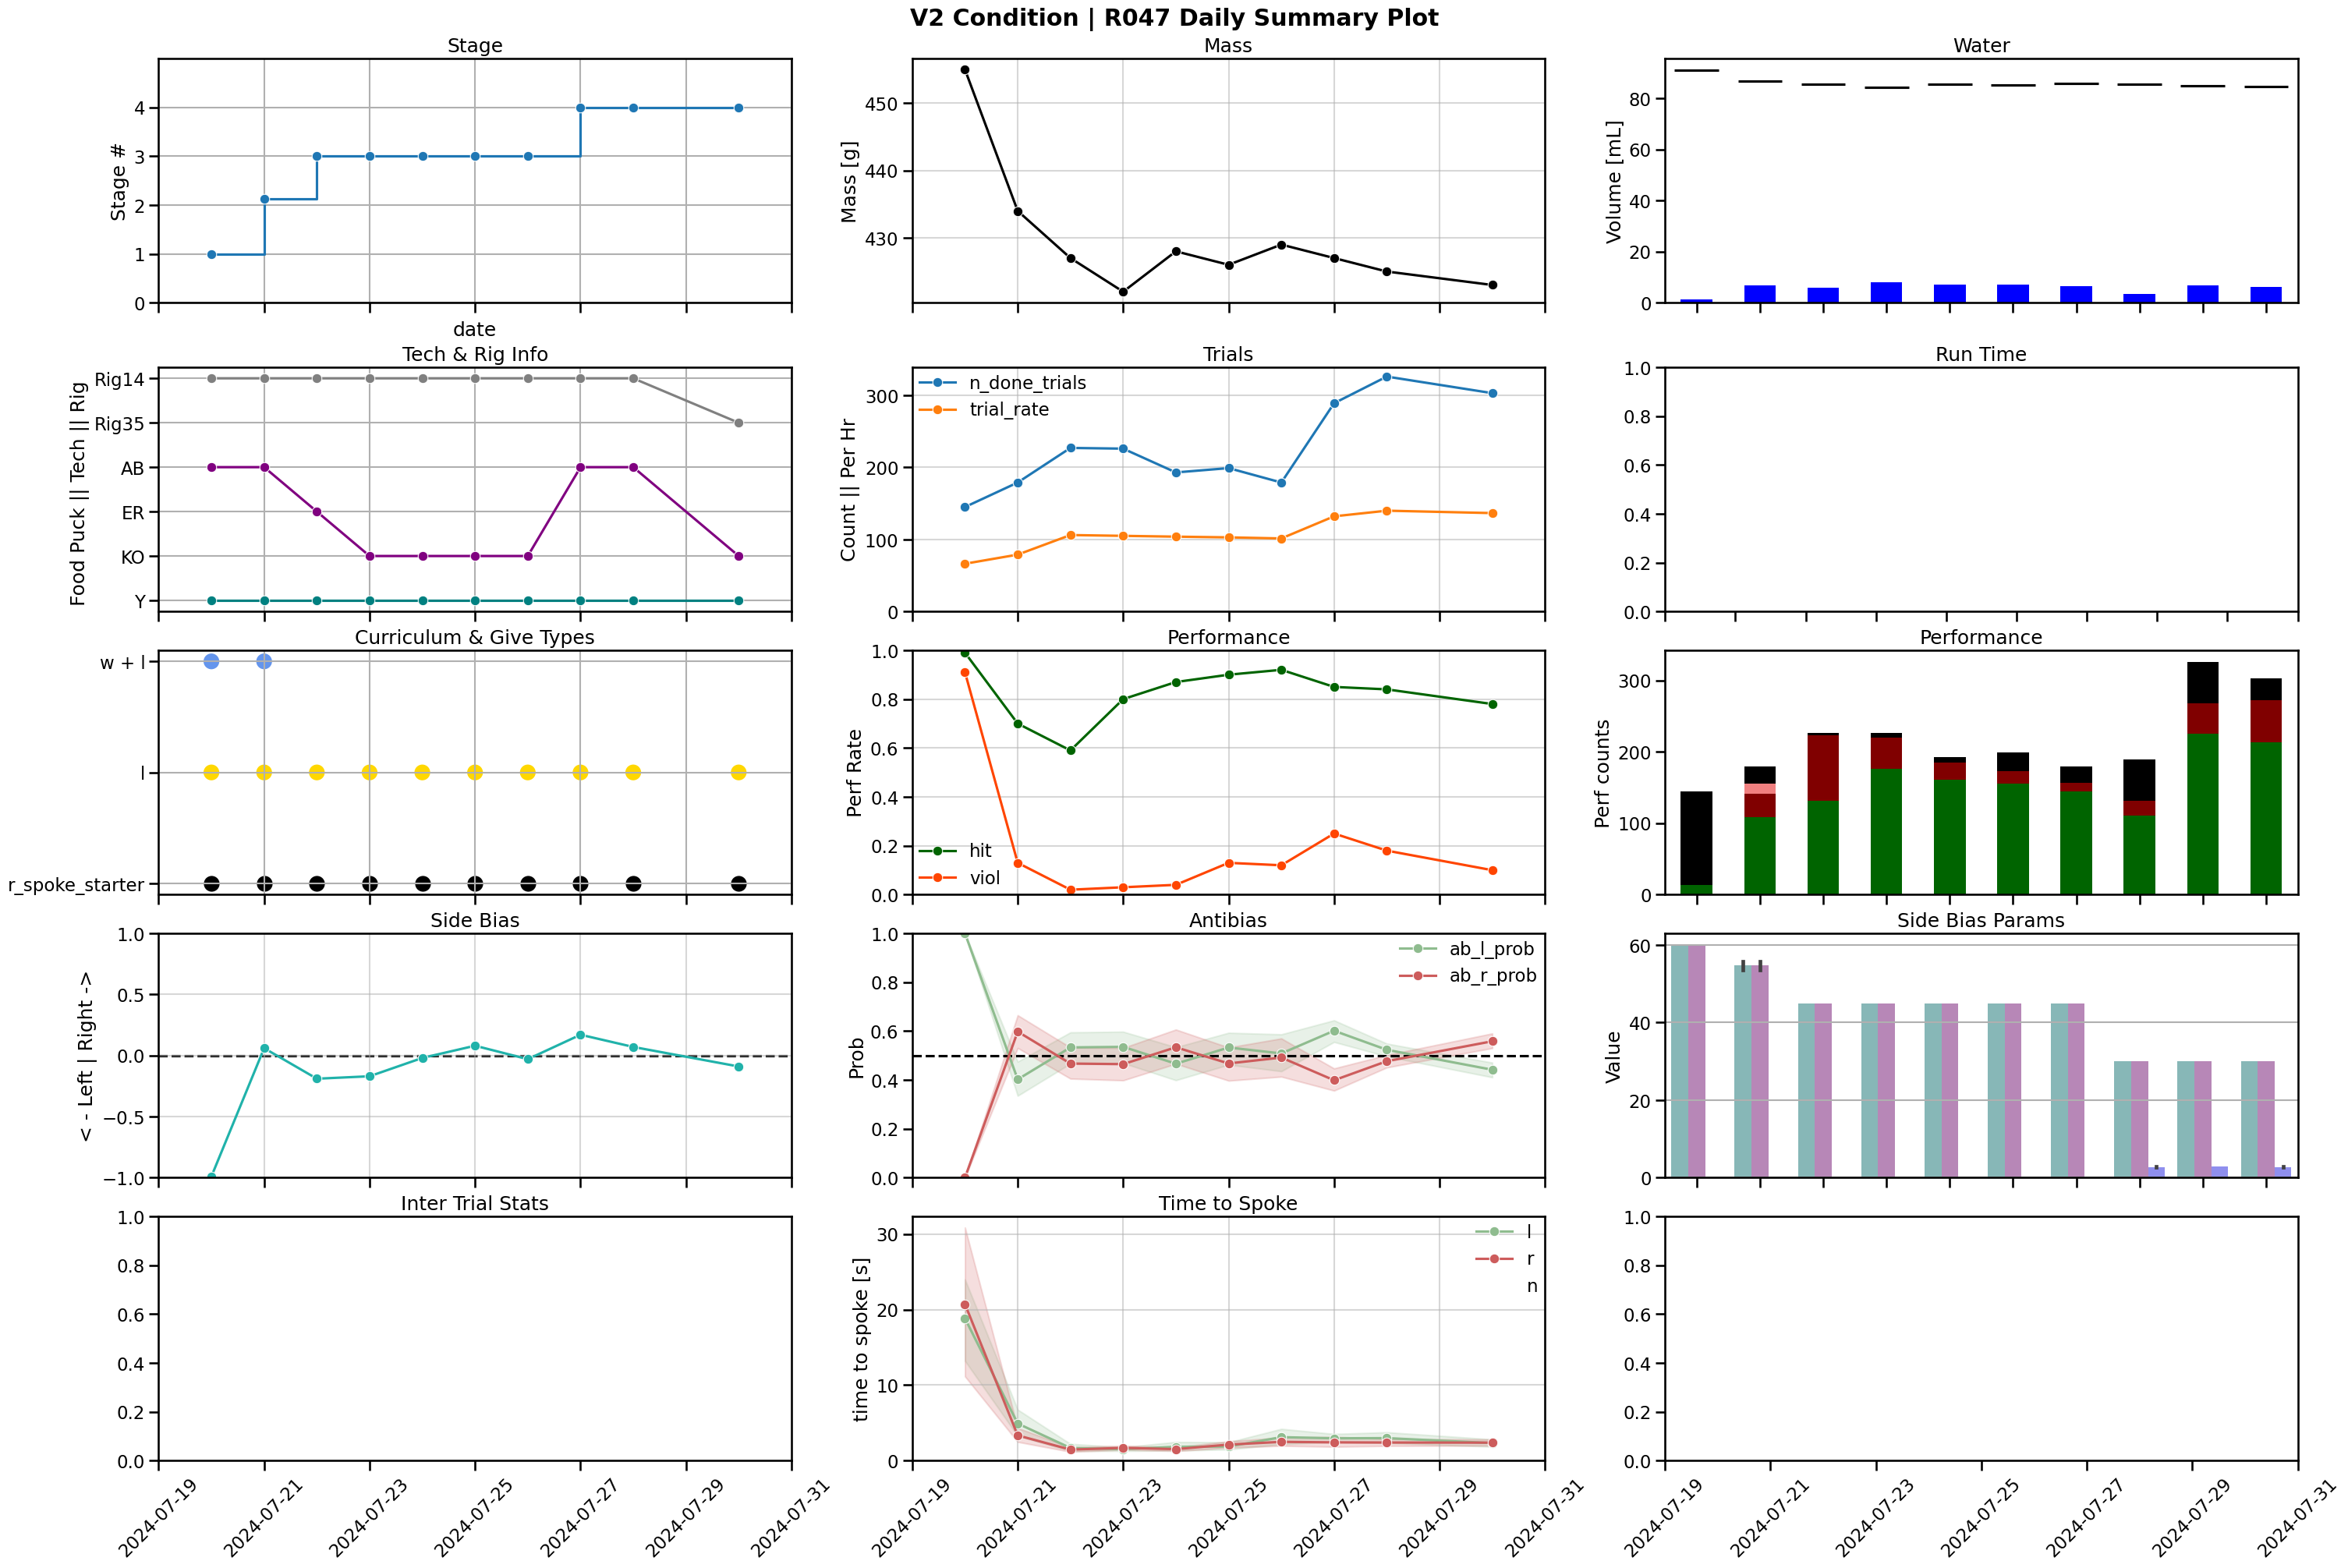

In [21]:
for animal_id, animal_days_df in days_df.query("animal_id in @ALPHA_1_ANIMALS").groupby(
    "animal_id"
):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

## Plot Within Day (Saved Out)

In [24]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ALPHA_1_ANIMALS"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R043_2024-07-30_day_summary


---
# Alpha 2s

These animals started later and some run in session 6 while others run in session 7

##  Plot over Days






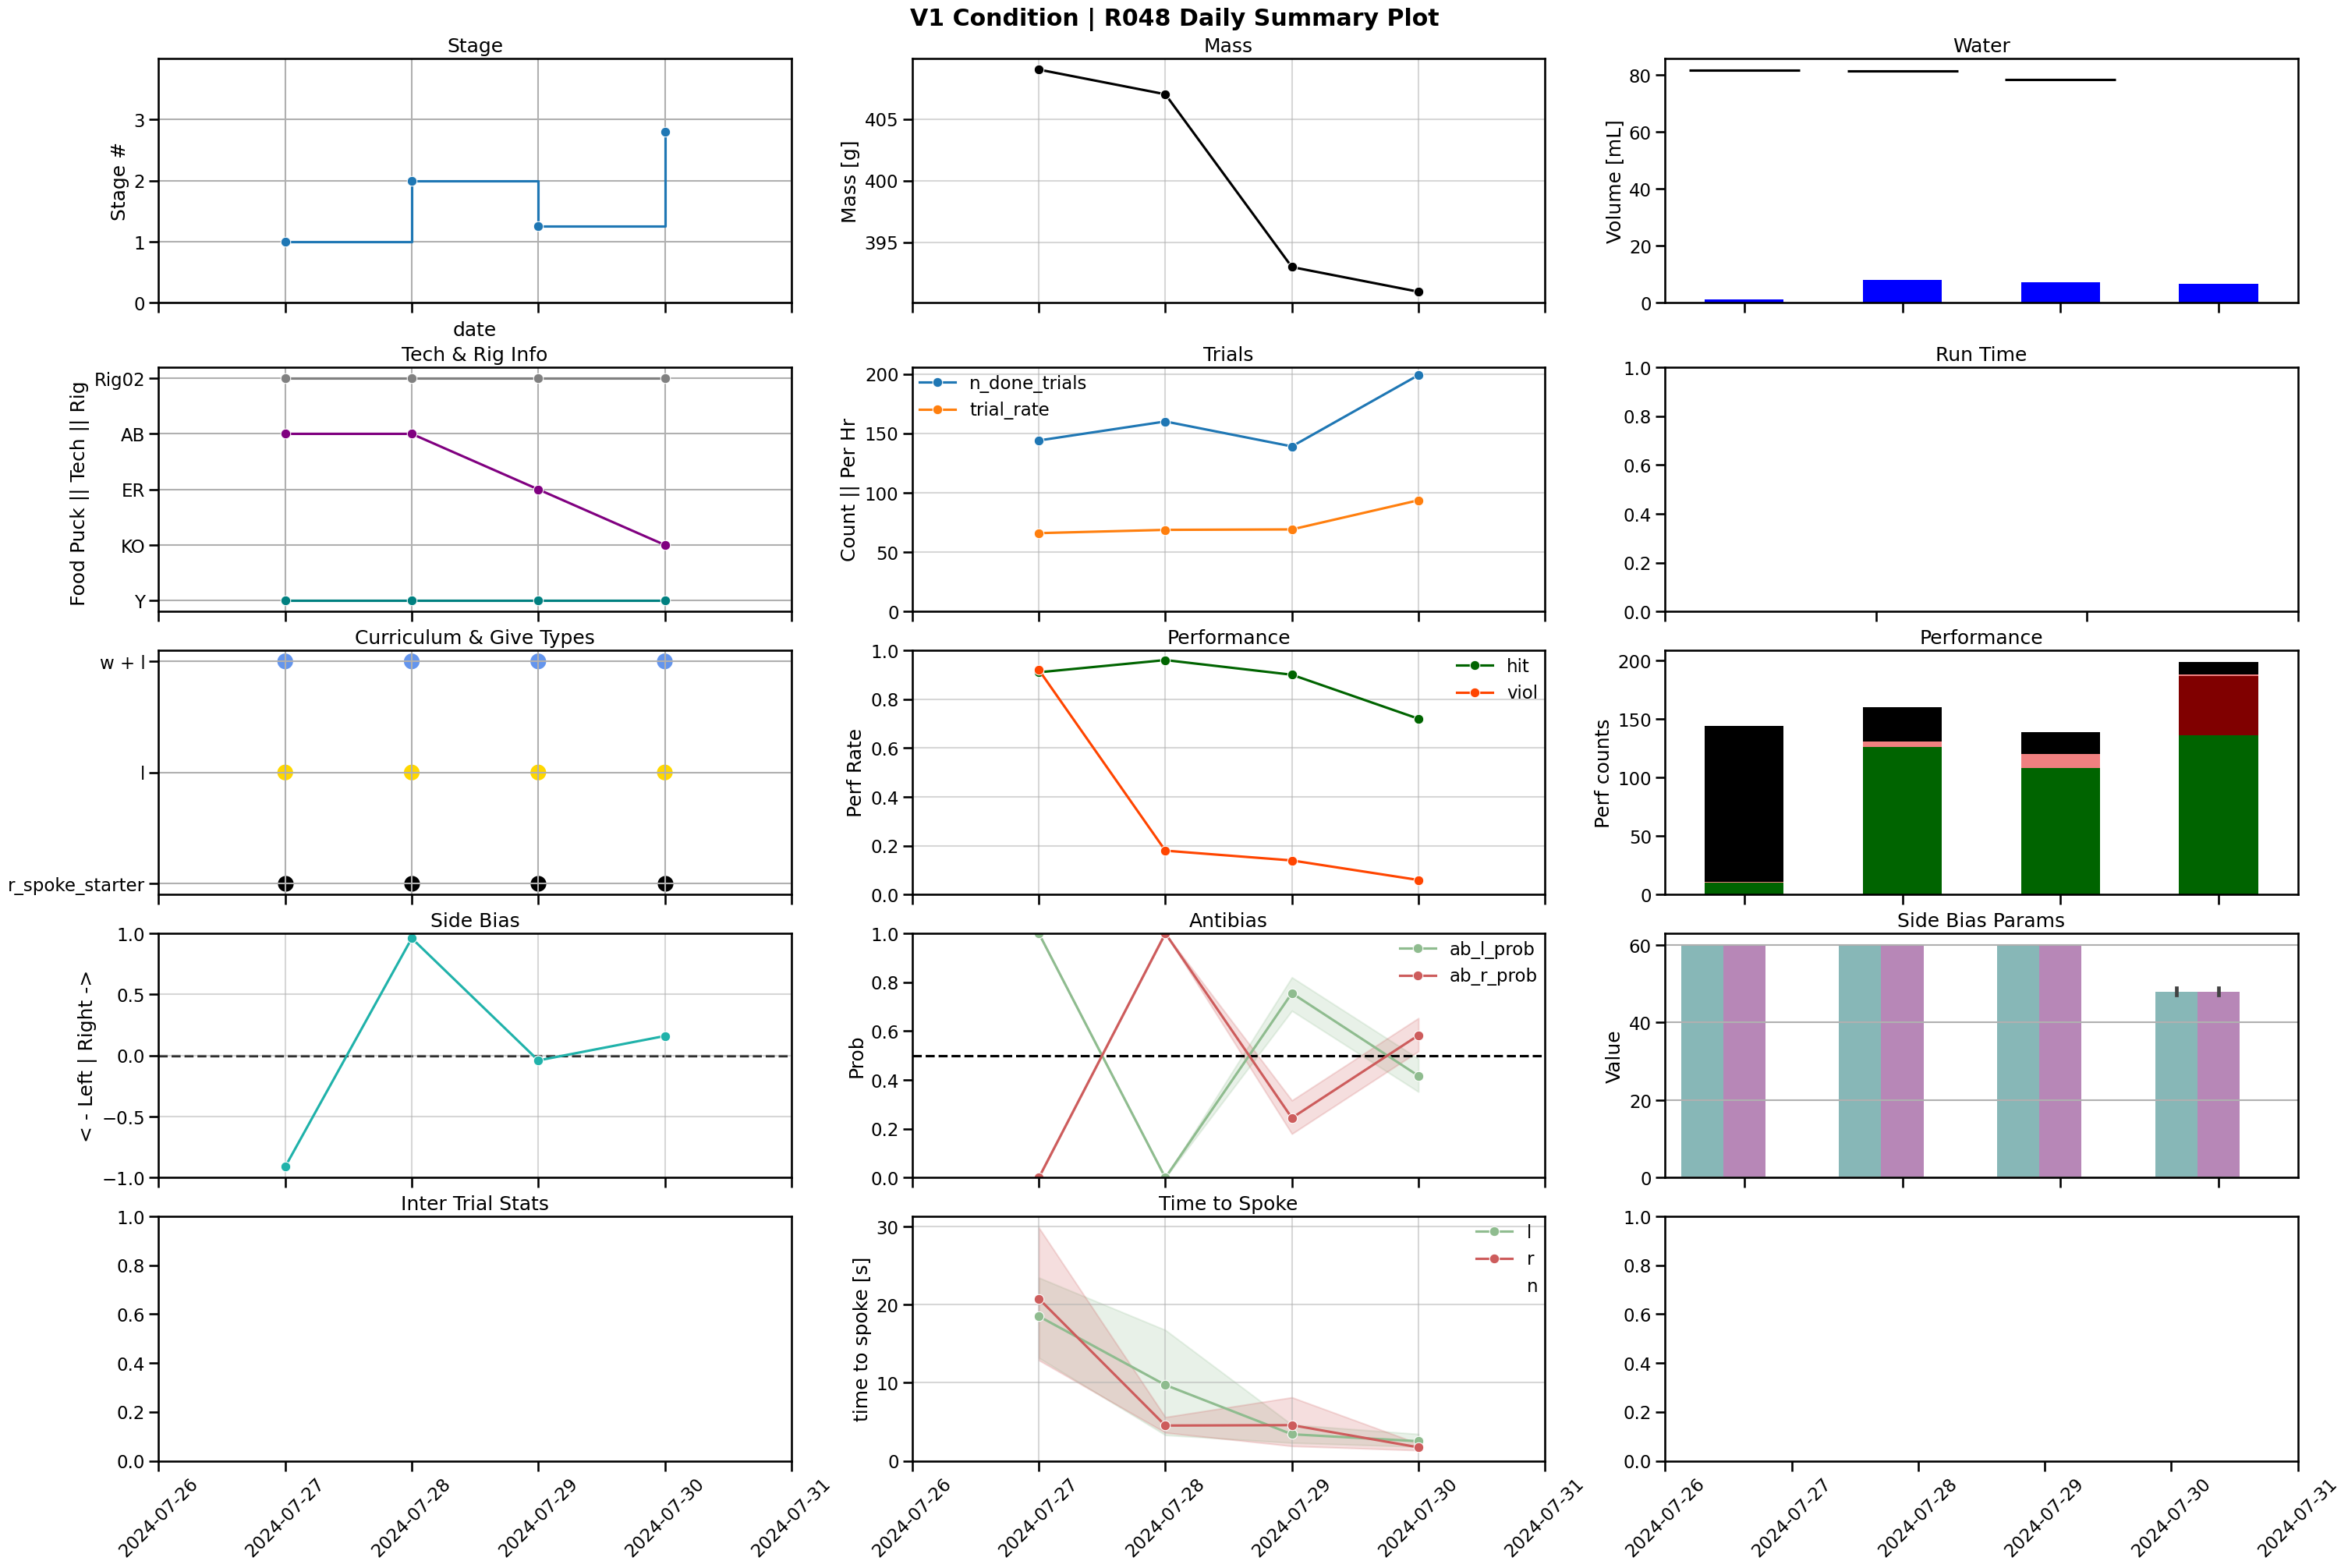

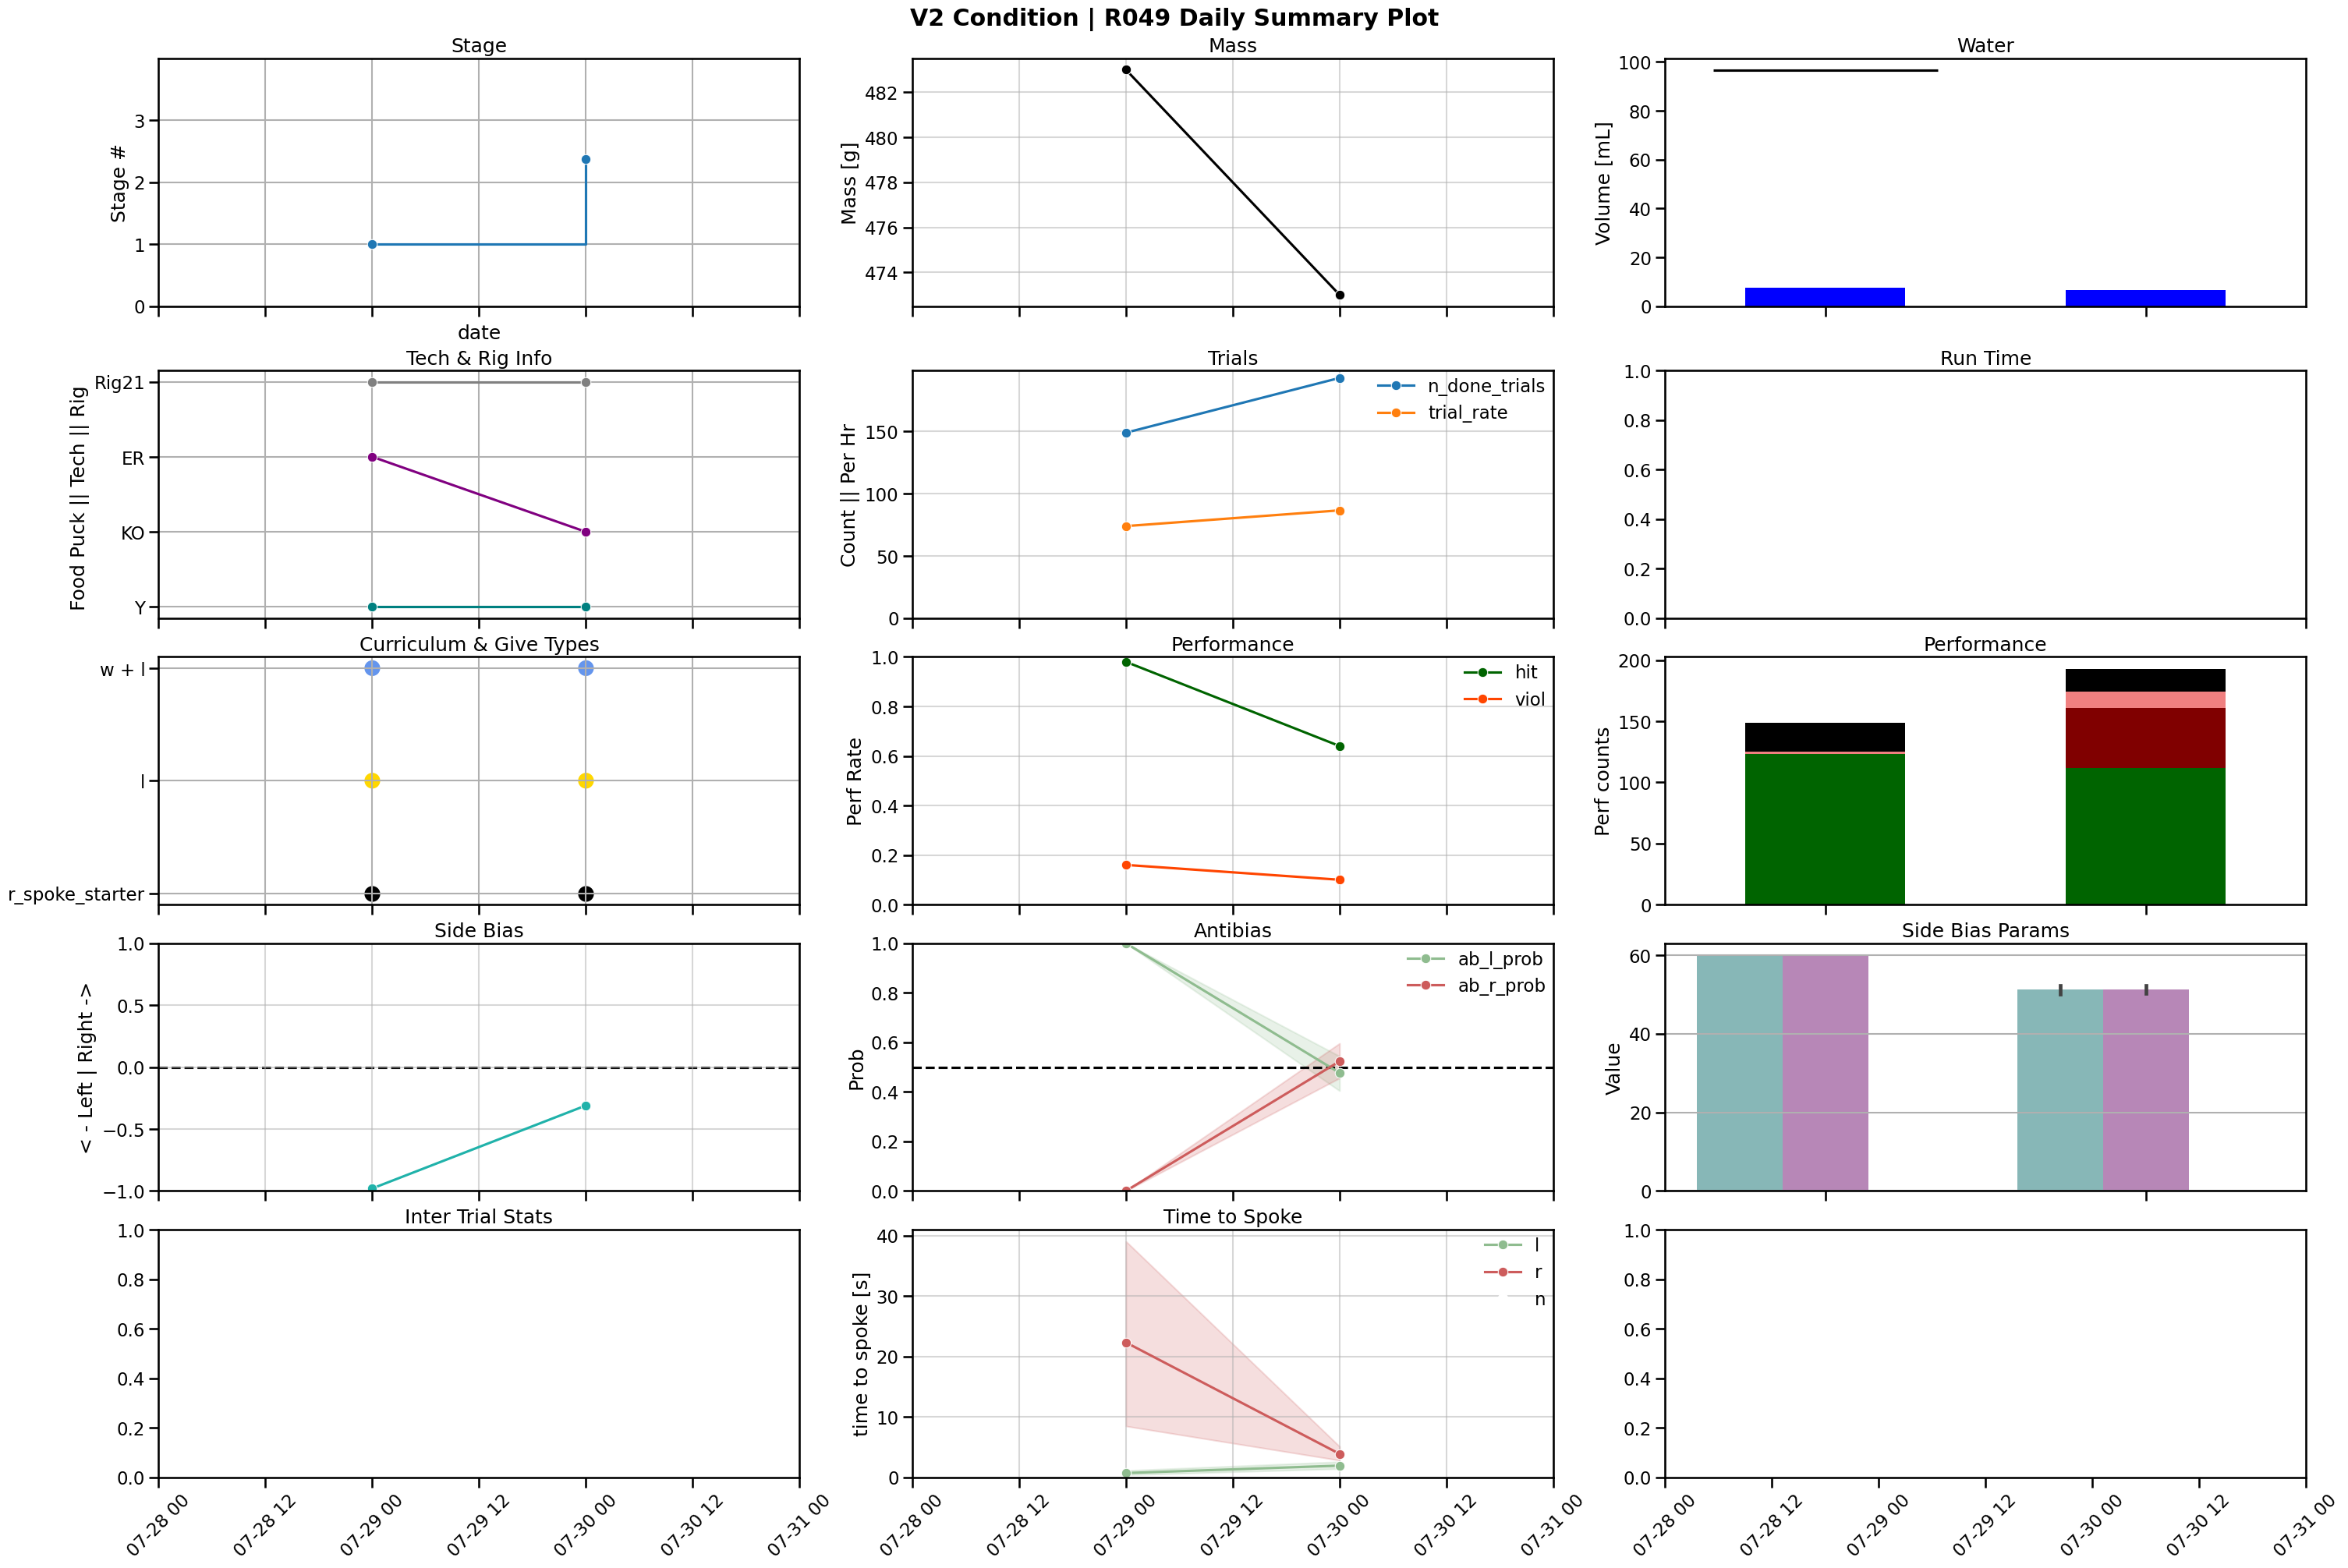

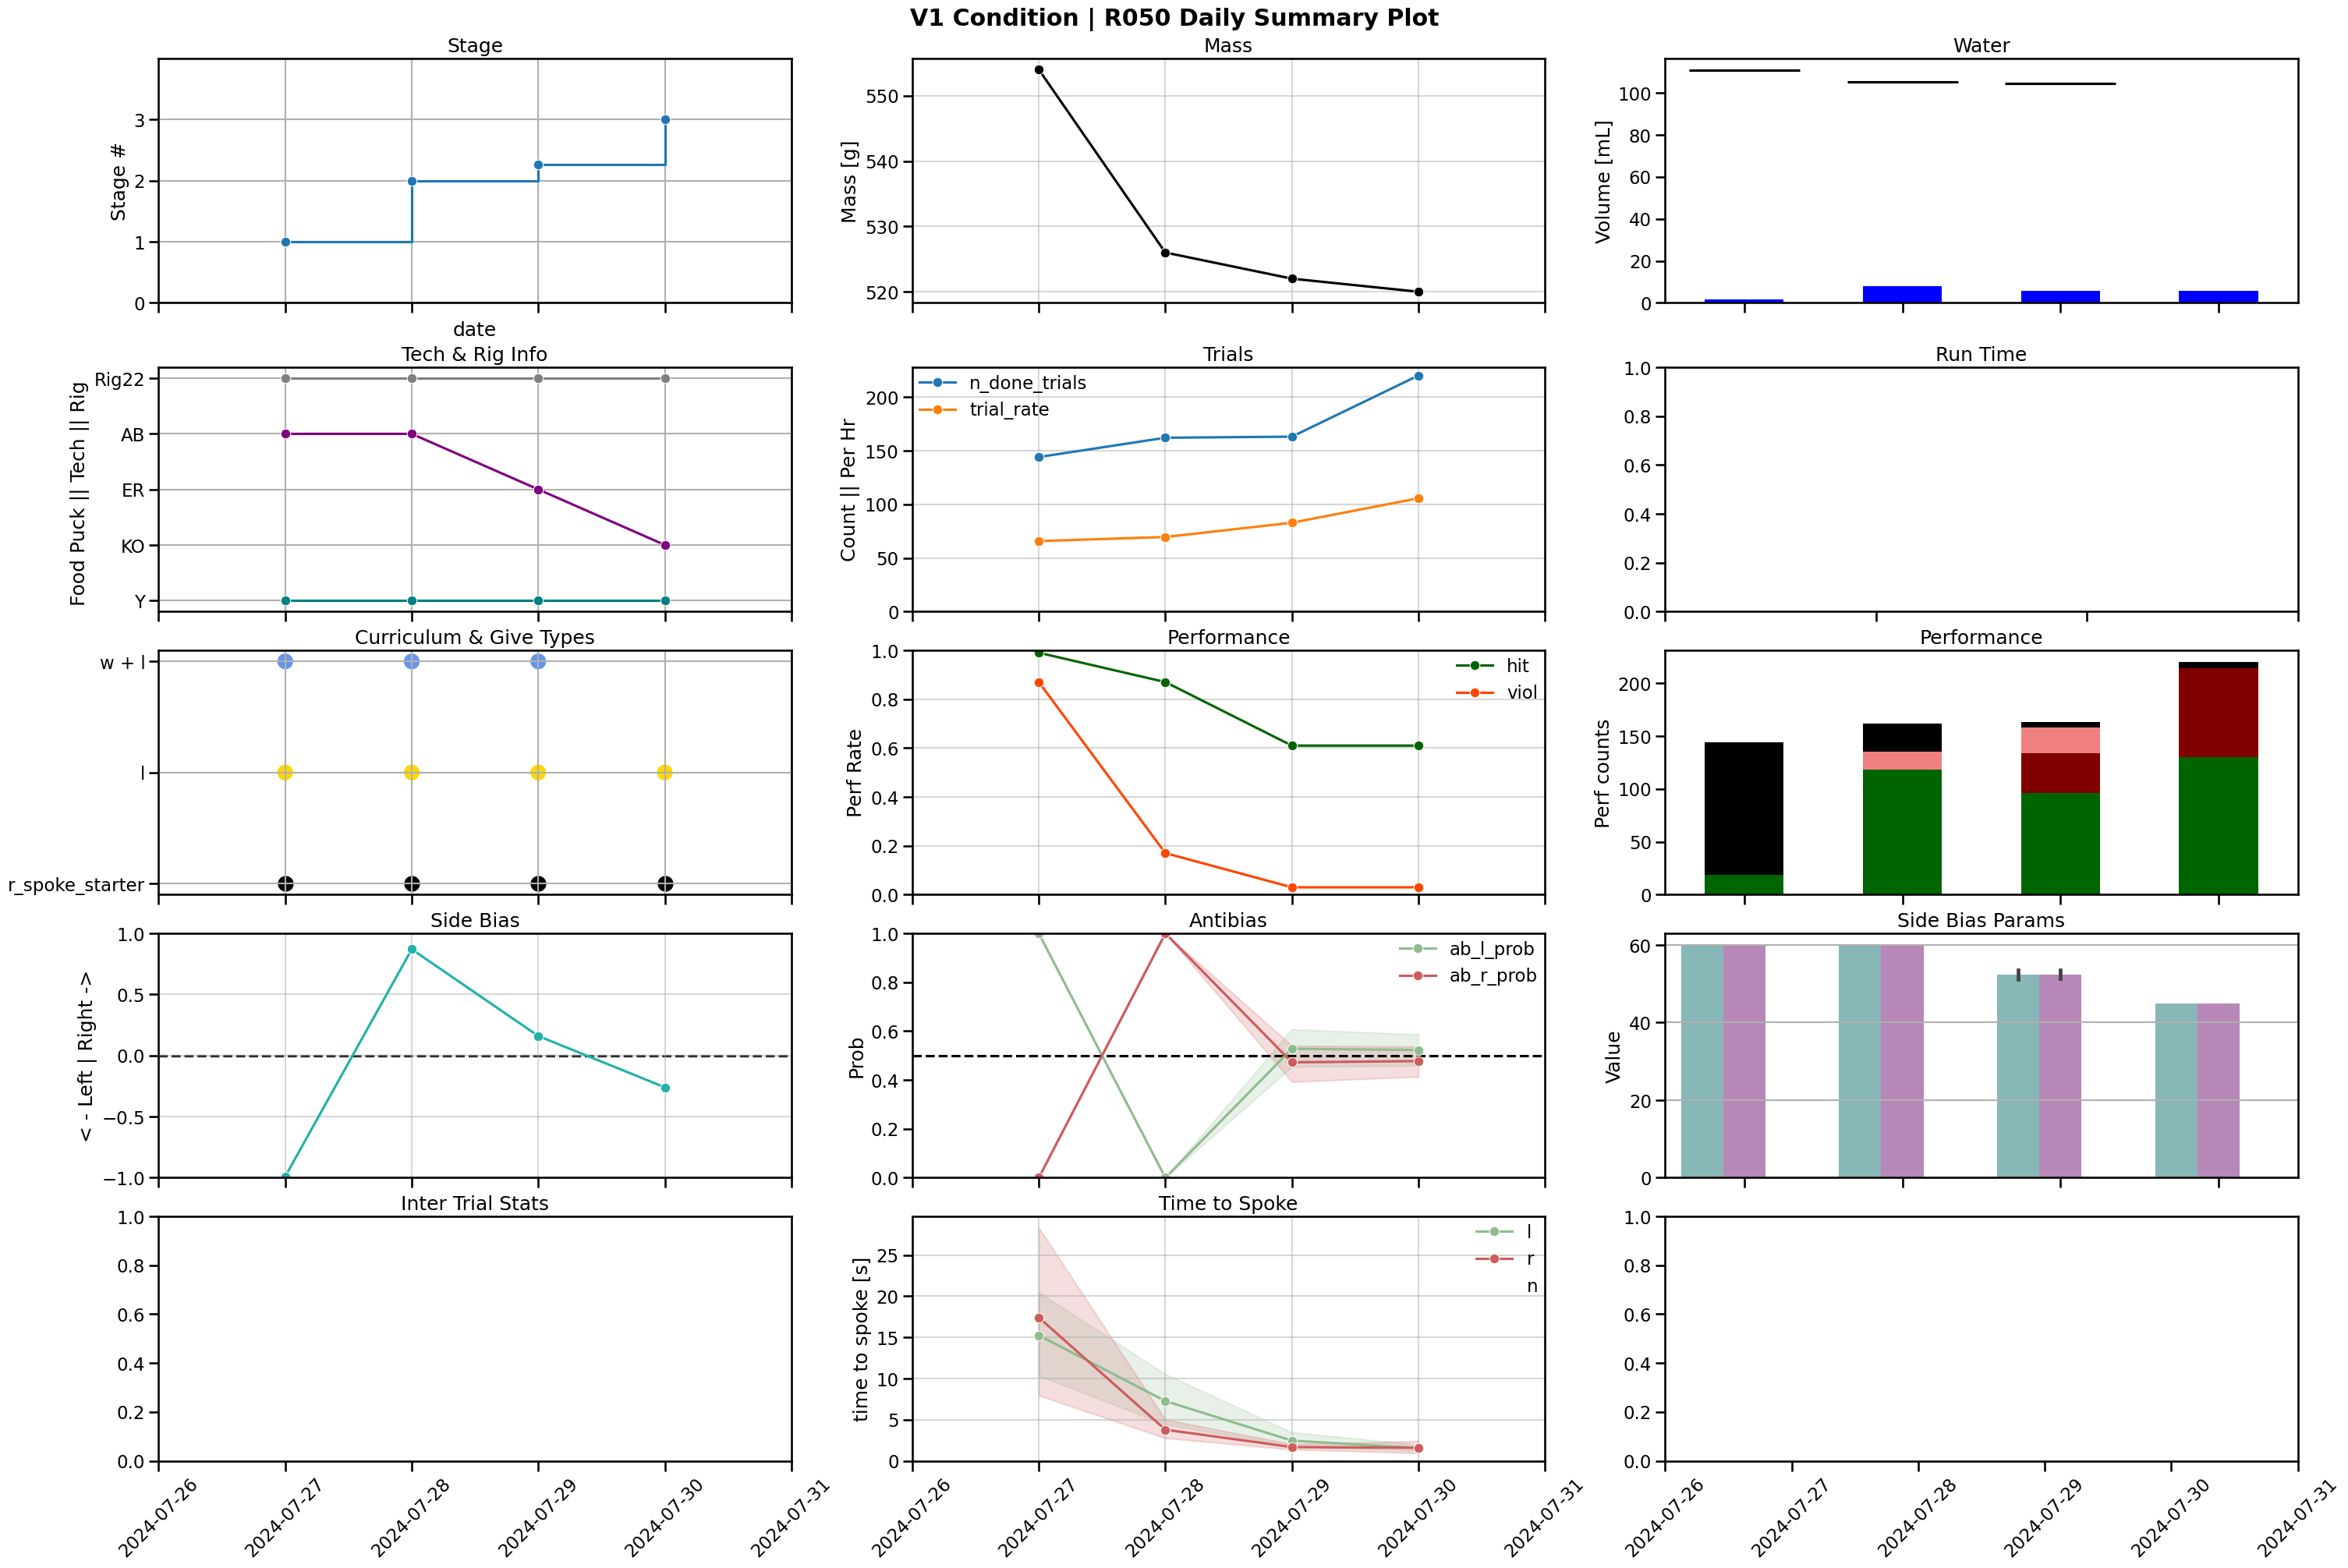

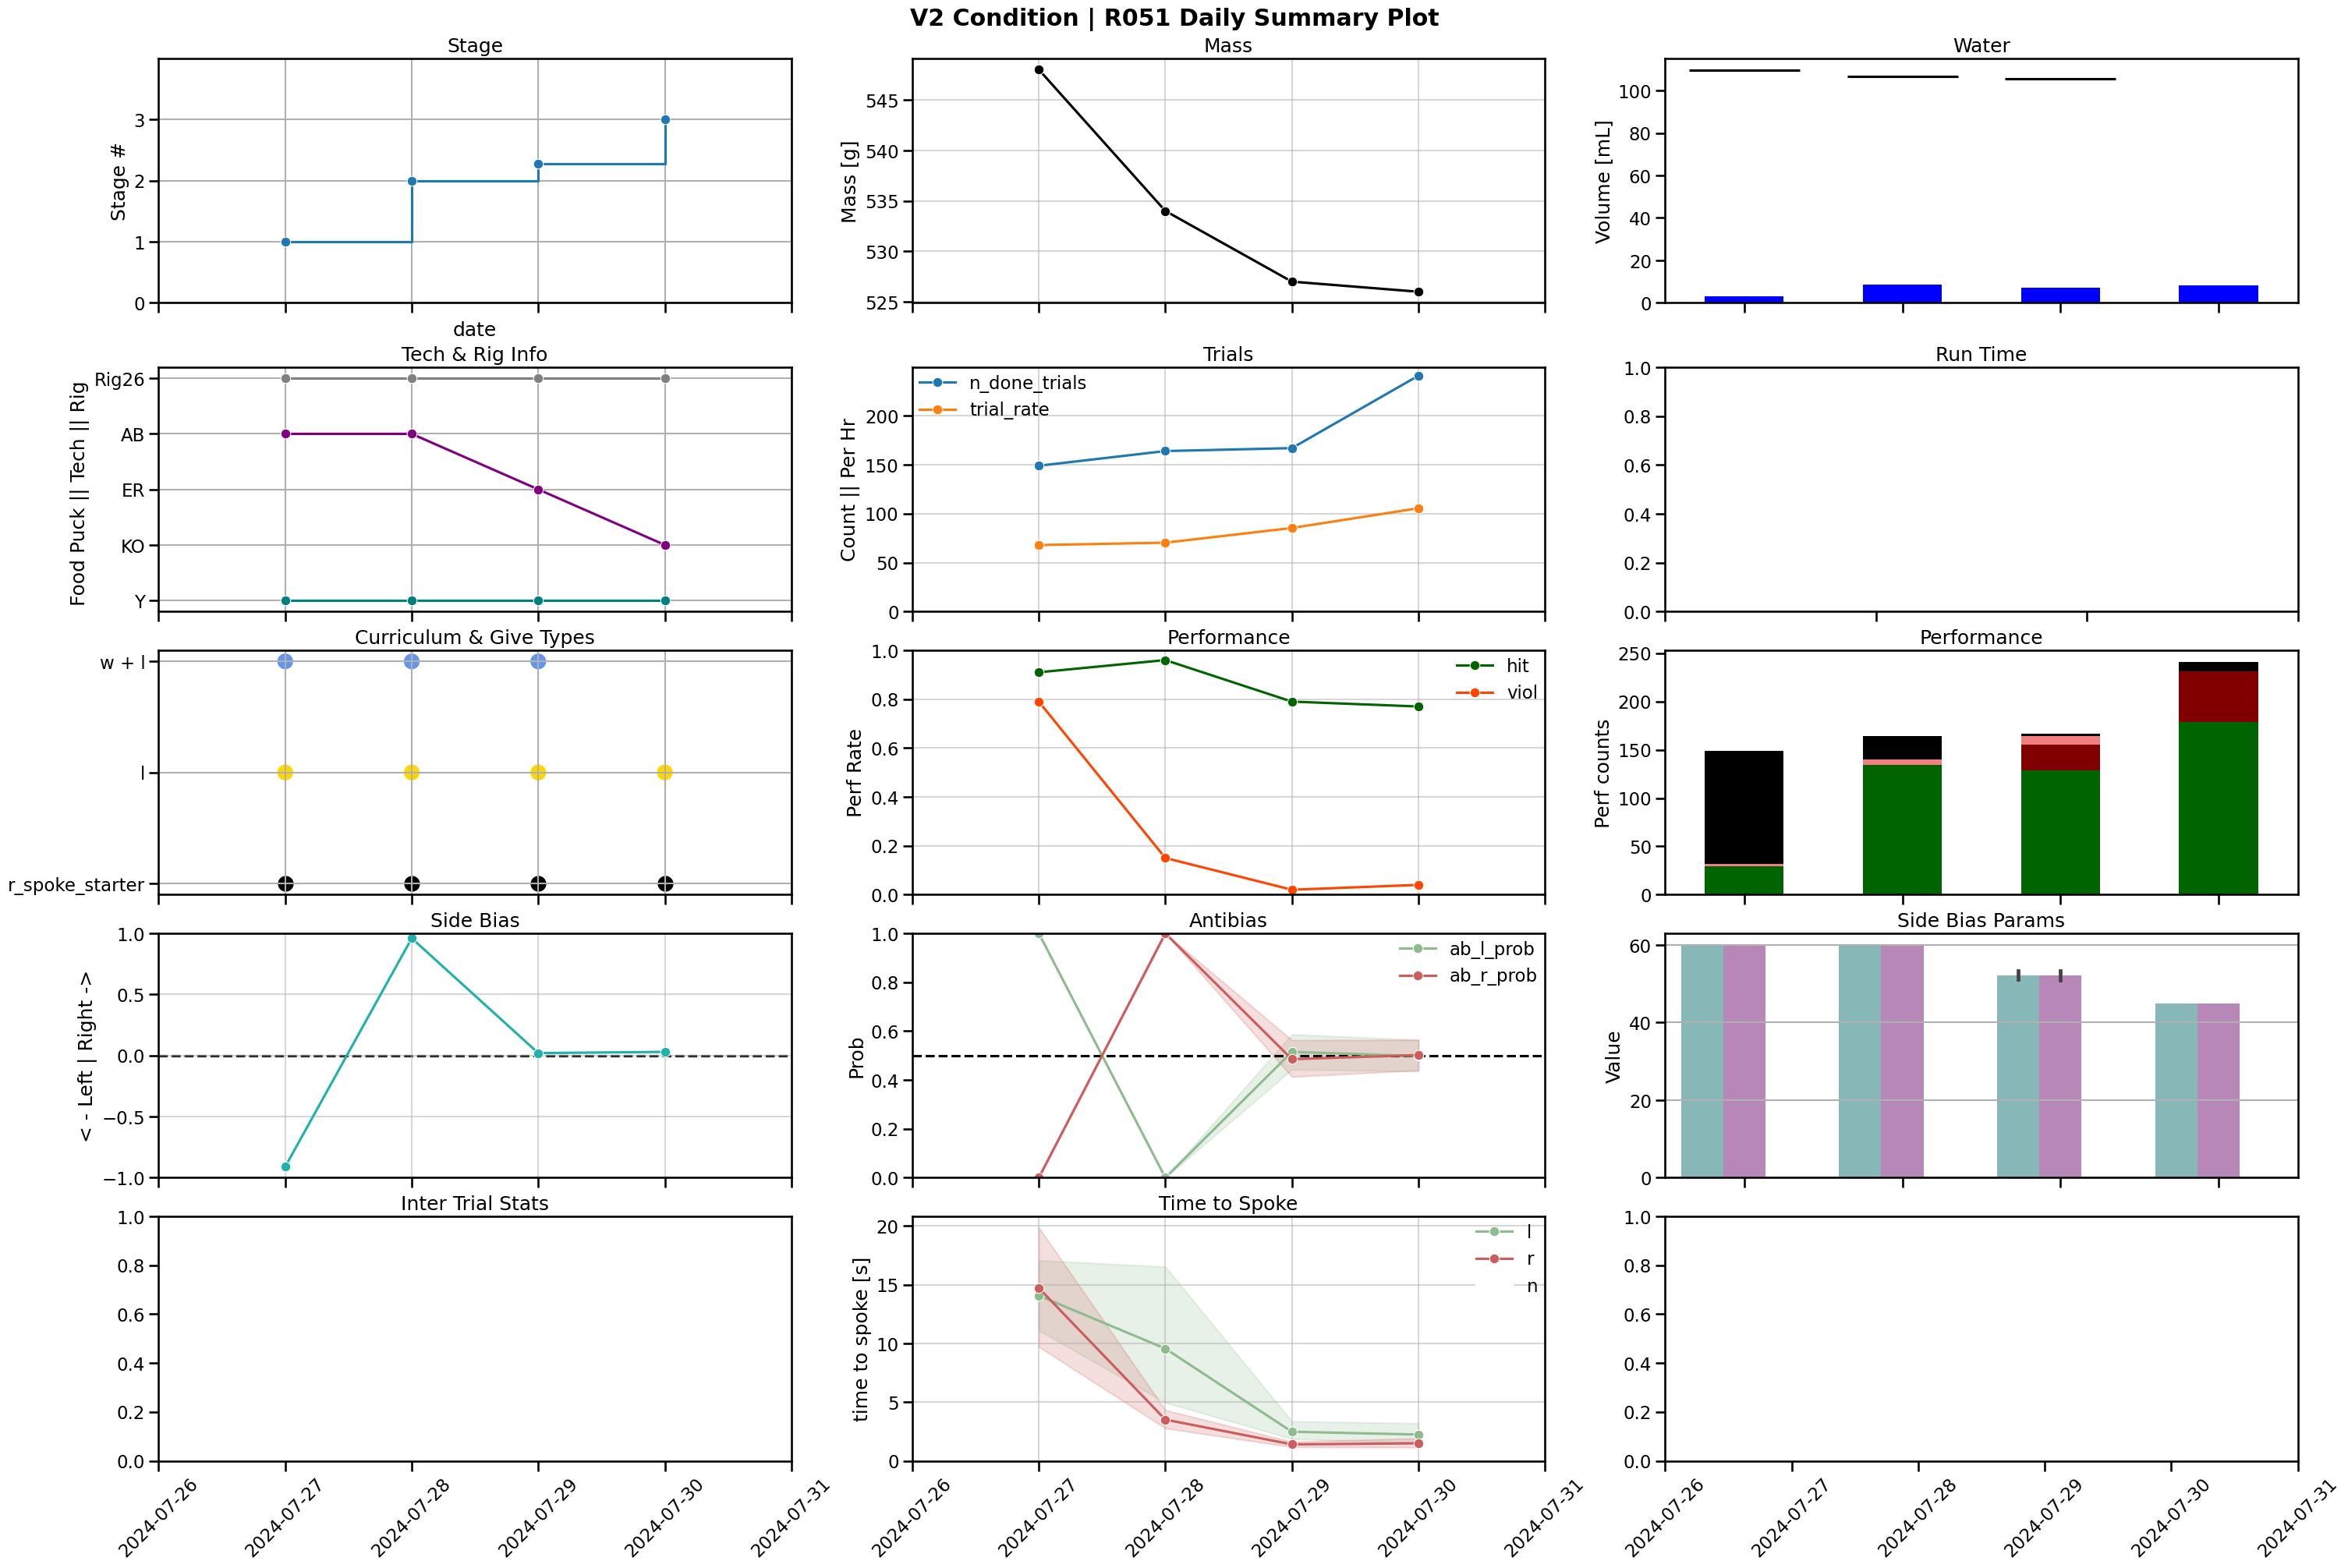

In [11]:
# ALPHA_2_SESSION_6 = set(ALPHA_2_ANIMALS) & set(ALPHA_SESSION_6)
for animal_id, animal_days_df in days_df.query(
    "animal_id in @ALPHA_2_SESSION_6"
).groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

## Plot Within Day (Saved Out)

In [12]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ALPHA_2_SESSION_6"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R048_2024-07-30_day_summary
No data found on SessionAggDate for ['R048'] between 2024-07-30 and 2024-07-30


/Users/jessbreda/Desktop/github/jbreda_animal_training/src/behav_viz/utils/dj_utils.py:267: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_session_mass_water["num_water"] = df_session_mass_water["num_water"].fillna(0)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R049_2024-07-30_day_summary
No data found on SessionAggDate for ['R049'] between 2024-07-30 and 2024-07-30


/Users/jessbreda/Desktop/github/jbreda_animal_training/src/behav_viz/utils/dj_utils.py:267: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_session_mass_water["num_water"] = df_session_mass_water["num_water"].fillna(0)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R050_2024-07-30_day_summary
No data found on SessionAggDate for ['R050'] between 2024-07-30 and 2024-07-30


/Users/jessbreda/Desktop/github/jbreda_animal_training/src/behav_viz/utils/dj_utils.py:267: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_session_mass_water["num_water"] = df_session_mass_water["num_water"].fillna(0)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


making R051_2024-07-30_day_summary
No data found on SessionAggDate for ['R051'] between 2024-07-30 and 2024-07-30


/Users/jessbreda/Desktop/github/jbreda_animal_training/src/behav_viz/utils/dj_utils.py:267: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_session_mass_water["num_water"] = df_session_mass_water["num_water"].fillna(0)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


---
# Session 7 Alpha 2

In [13]:
MIN_DATE = get_start_date(group="alpha_2", type="str")


## Load in Trials & Days Data


In [15]:
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=ALPHA_SESSION_7, date_min=MIN_DATE
)
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=ALPHA_SESSION_7, date_min=MIN_DATE, verbose=True
)

[2024-07-31 11:46:29,212][WARNING]: MySQL server has gone away. Reconnecting to the server.


animal_id R052
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 for R052

animal_id R053
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 for R053

animal_id R054
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 for R054

animal_id R055
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 for R055

animal_id R056
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 for R056

animal_id R057
Fetched 4 dates from Sessions table from 2024-07-27 to 2024-07-30 for R057

Fetched data from SessionAggDate table from 2024-07-27 to 2024-07-30  
	Last date on the database is 2024-07-30 but user is querying data 
	for 2024-07-31. Attempting to manually aggregate today's data.
No new data from today, 2024-07-31 to add to SessionAggDate.

24 daily summaries fetched for animals: 
['R052', 'R053', 'R054', 'R055', 'R056', 'R057']
between 2024-07-27 and 2024-07-30


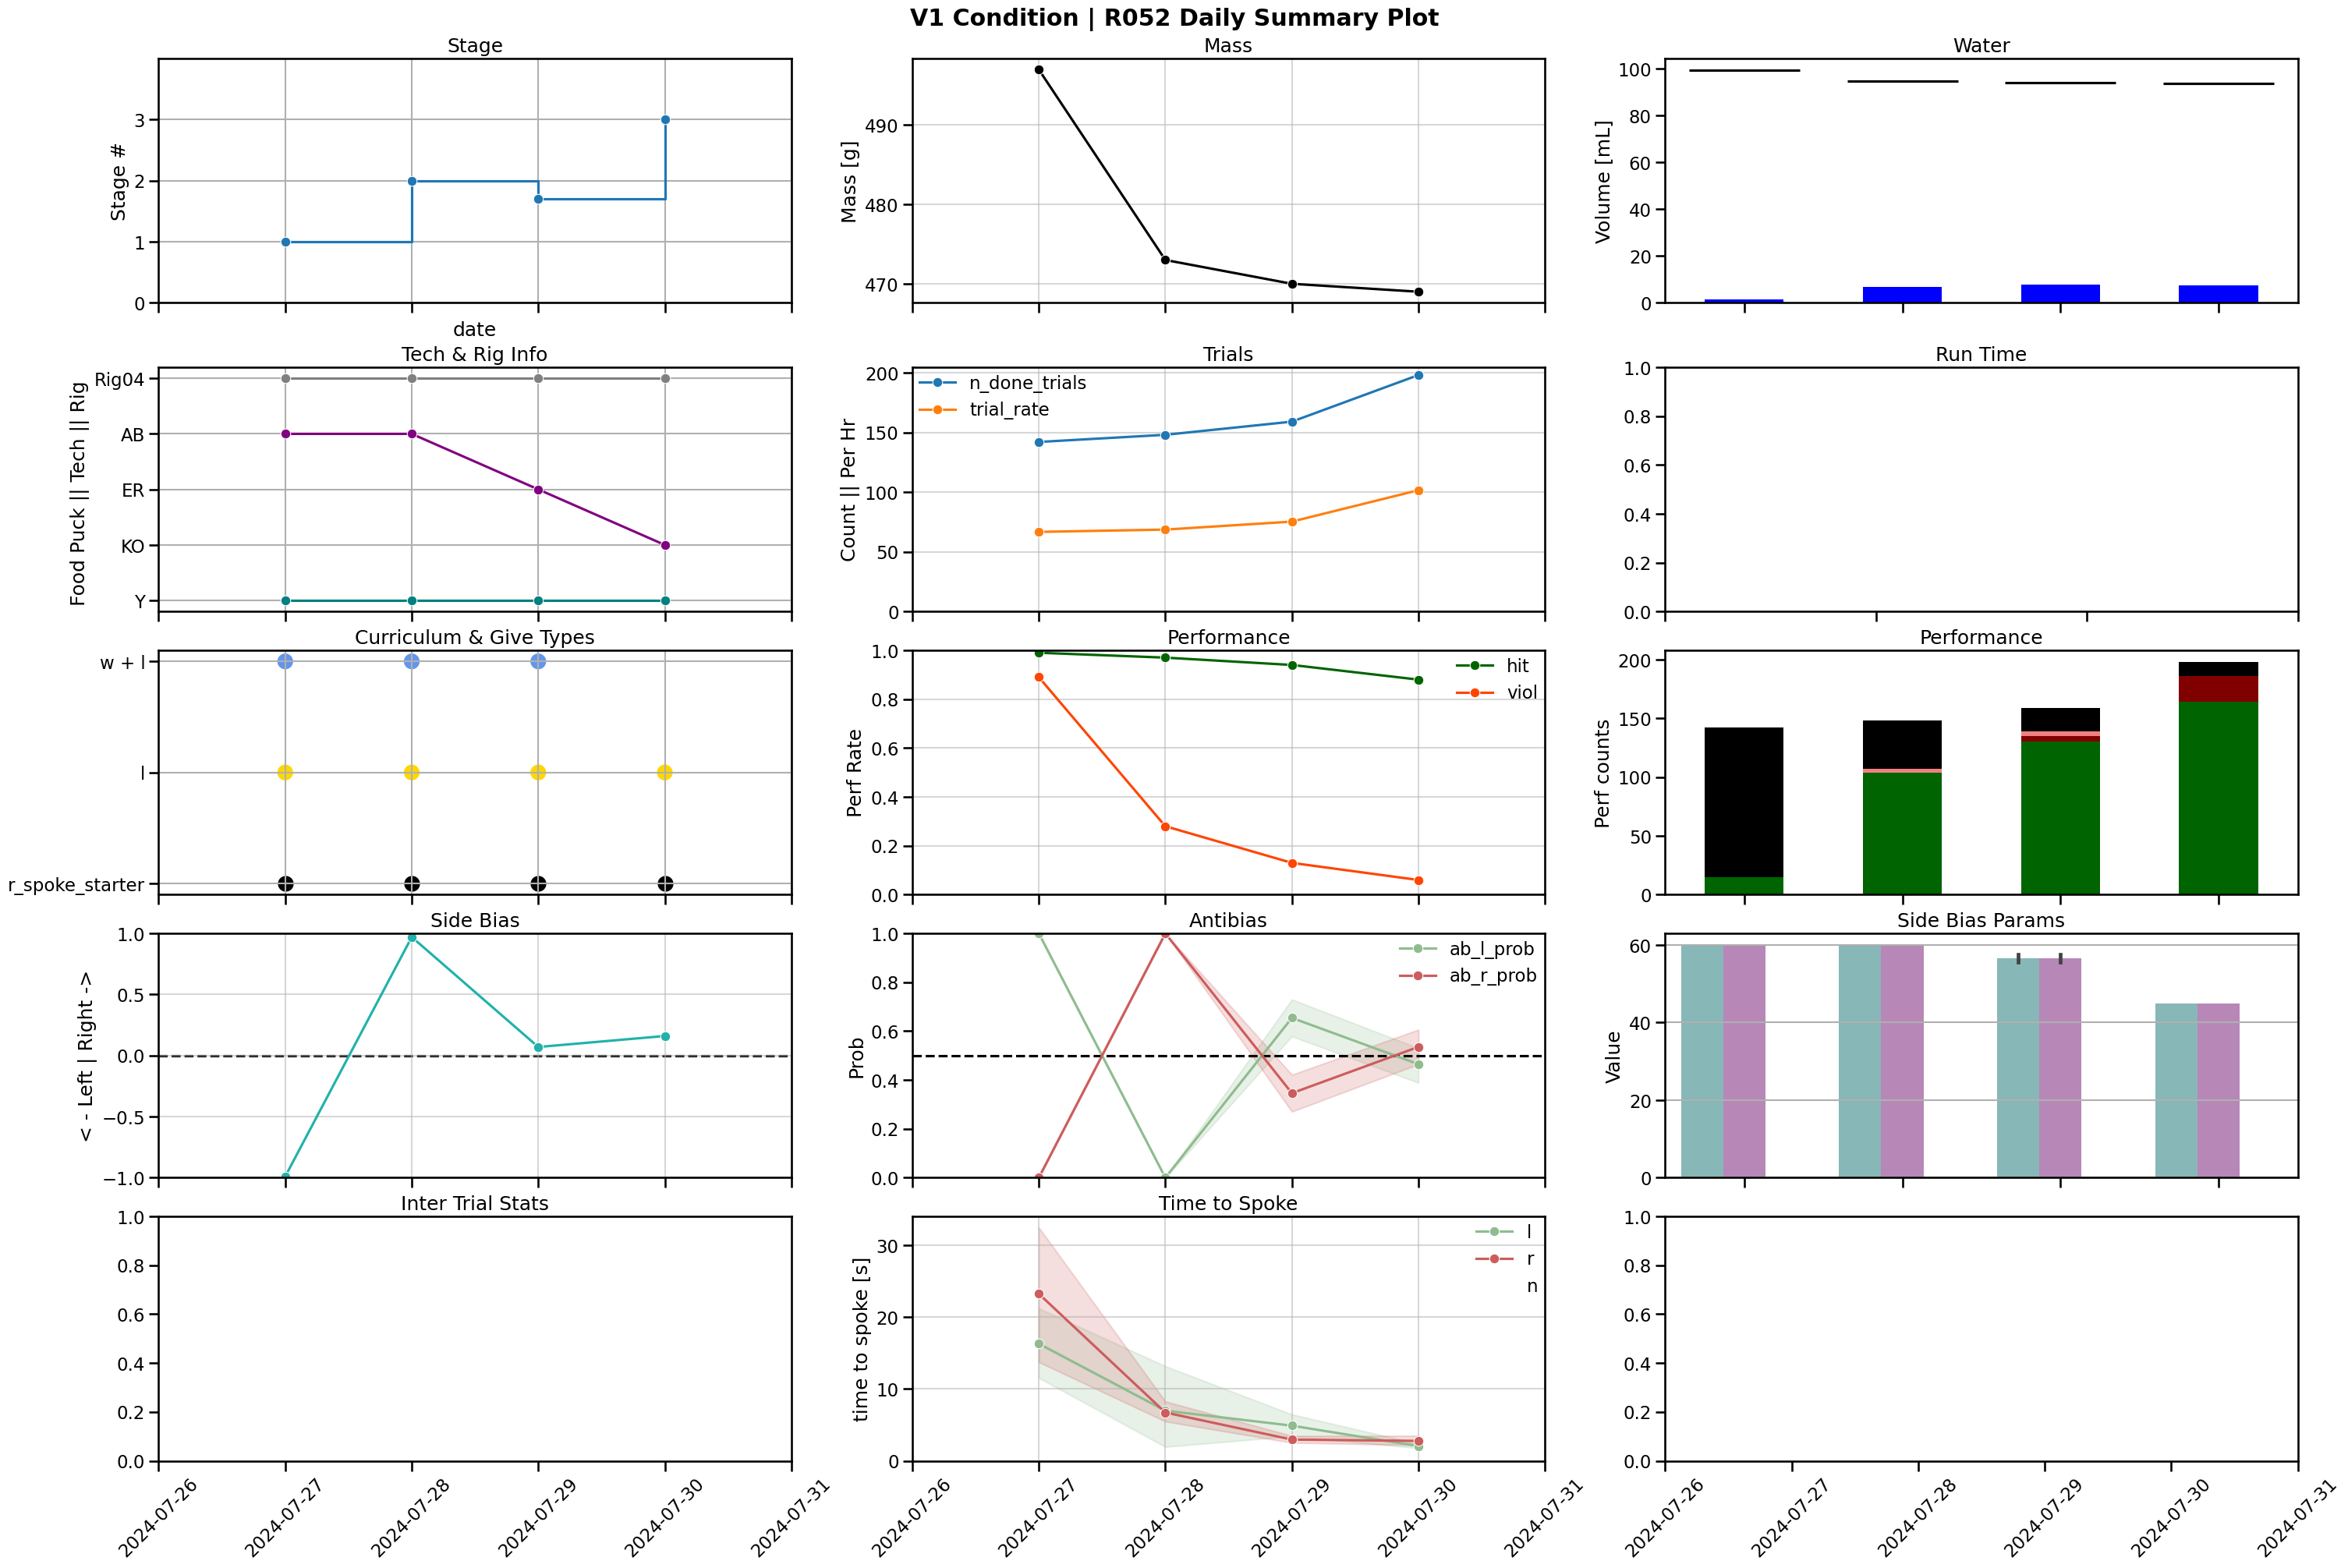

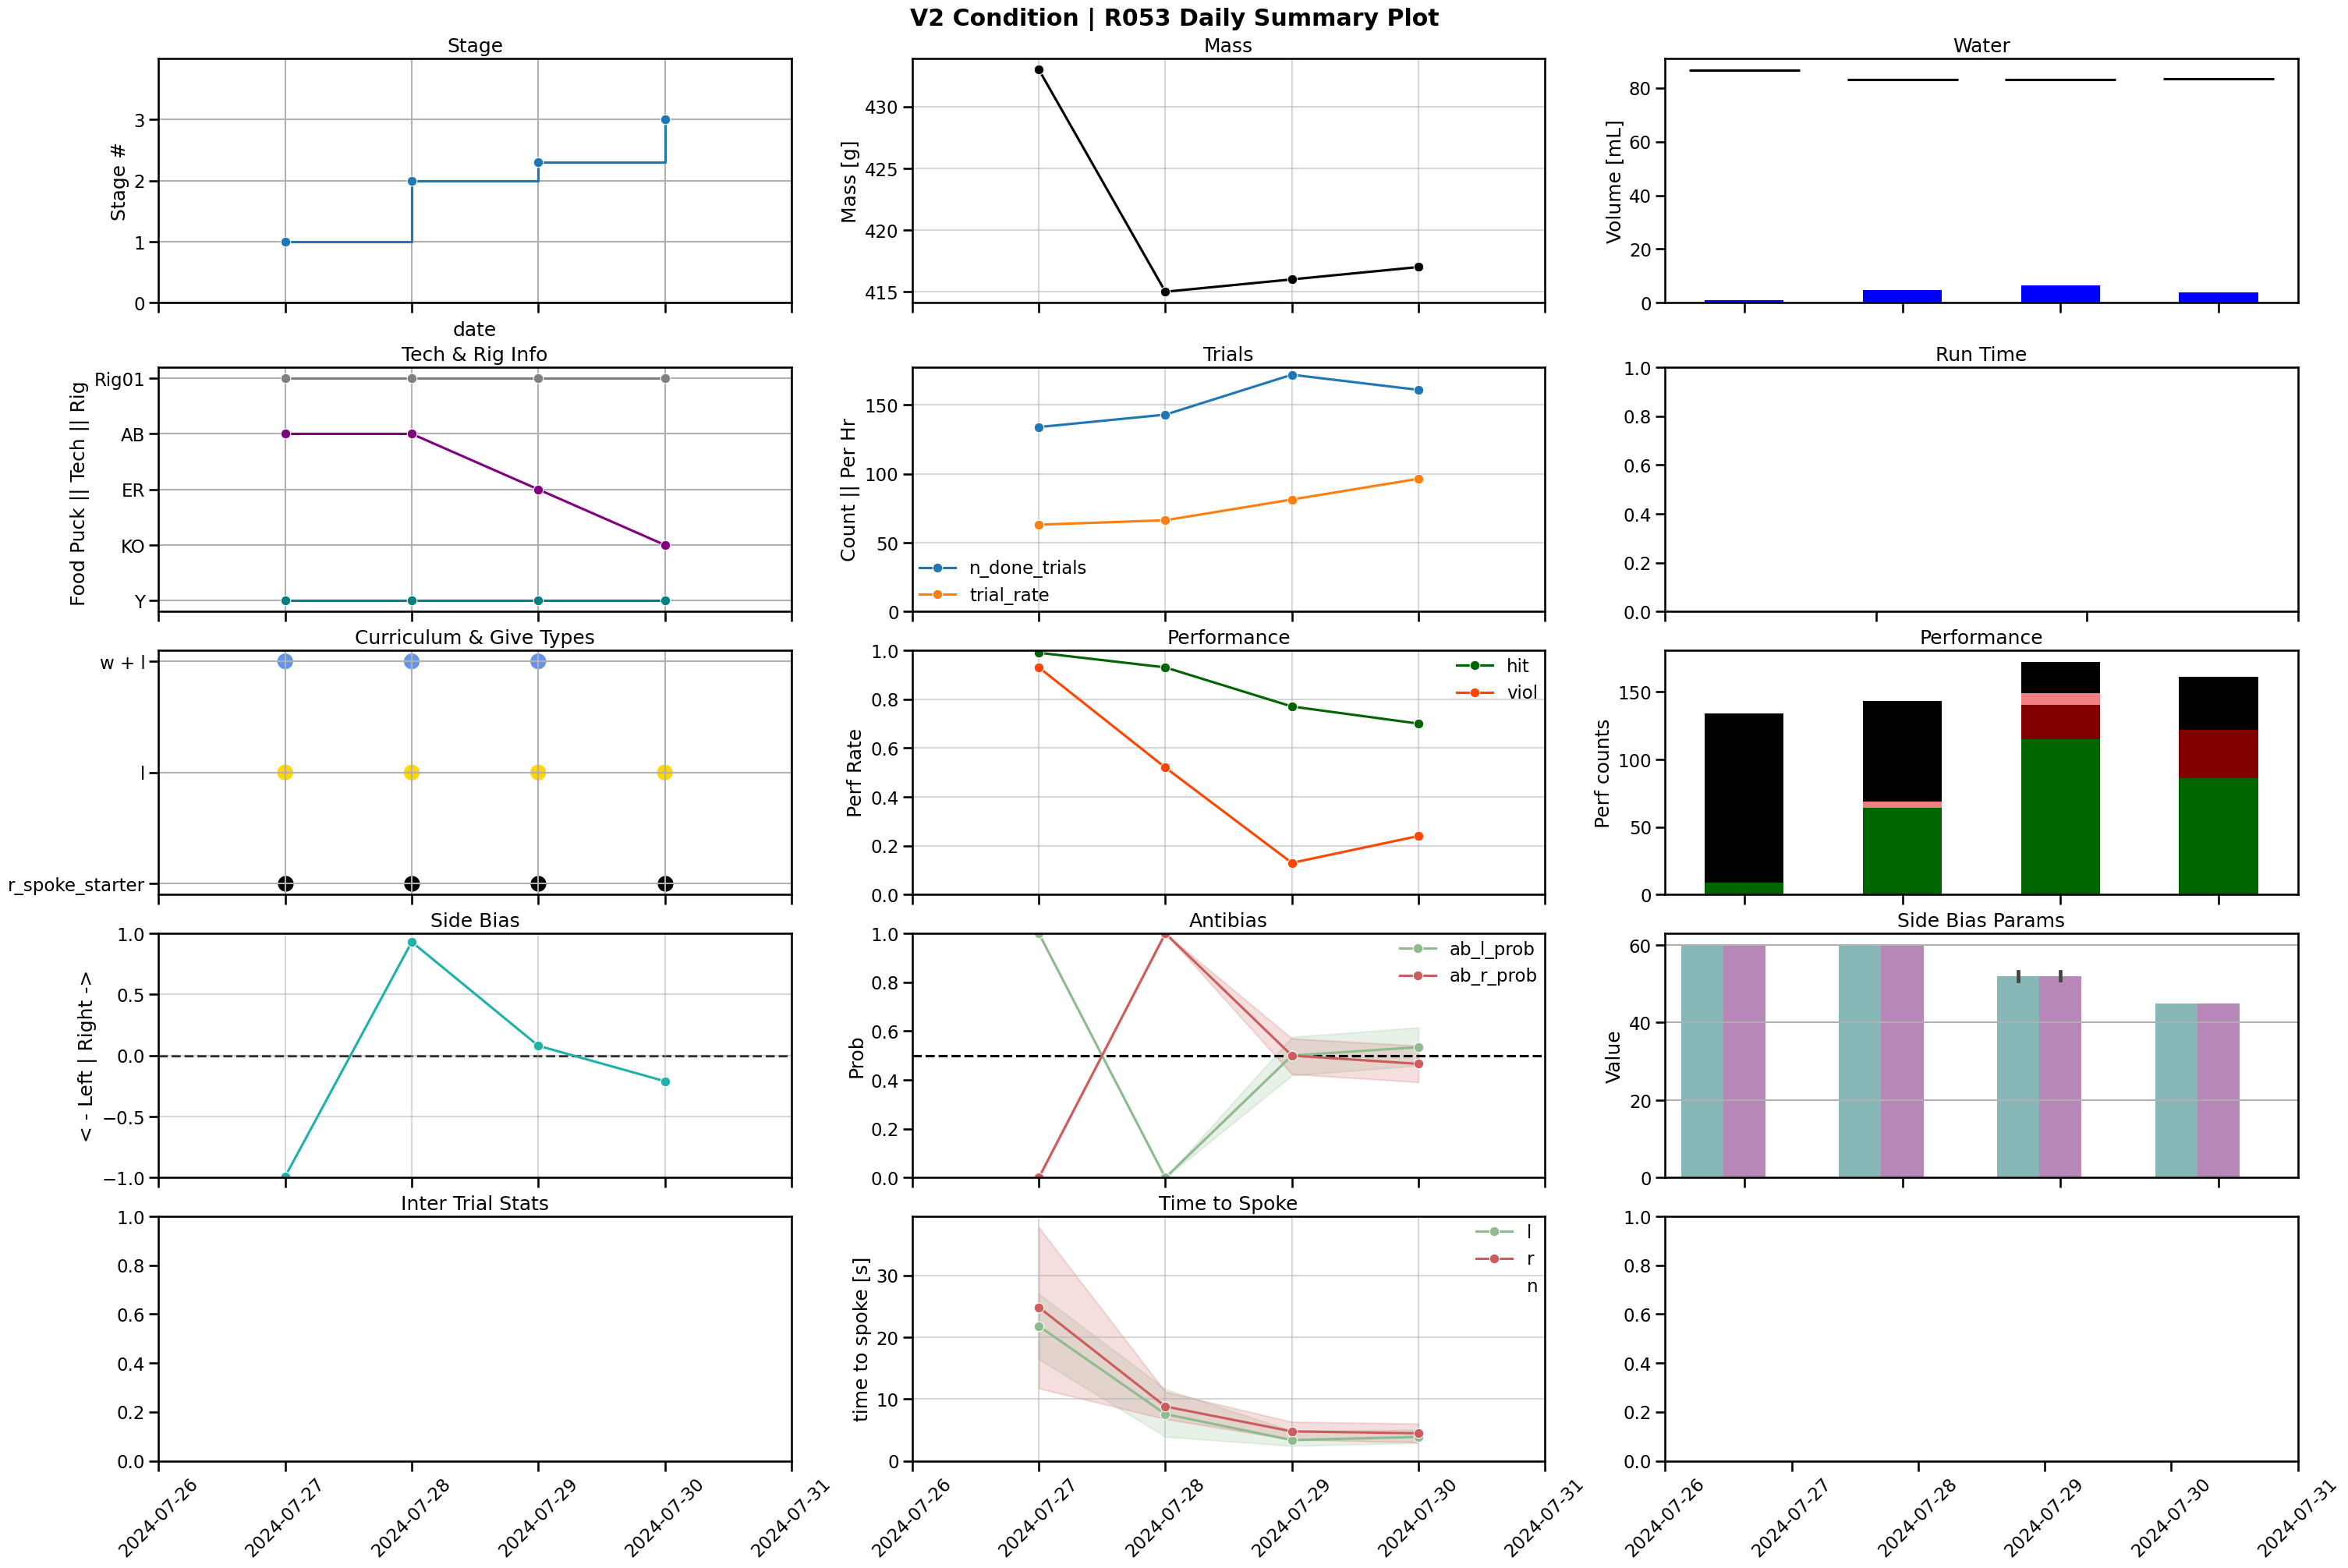

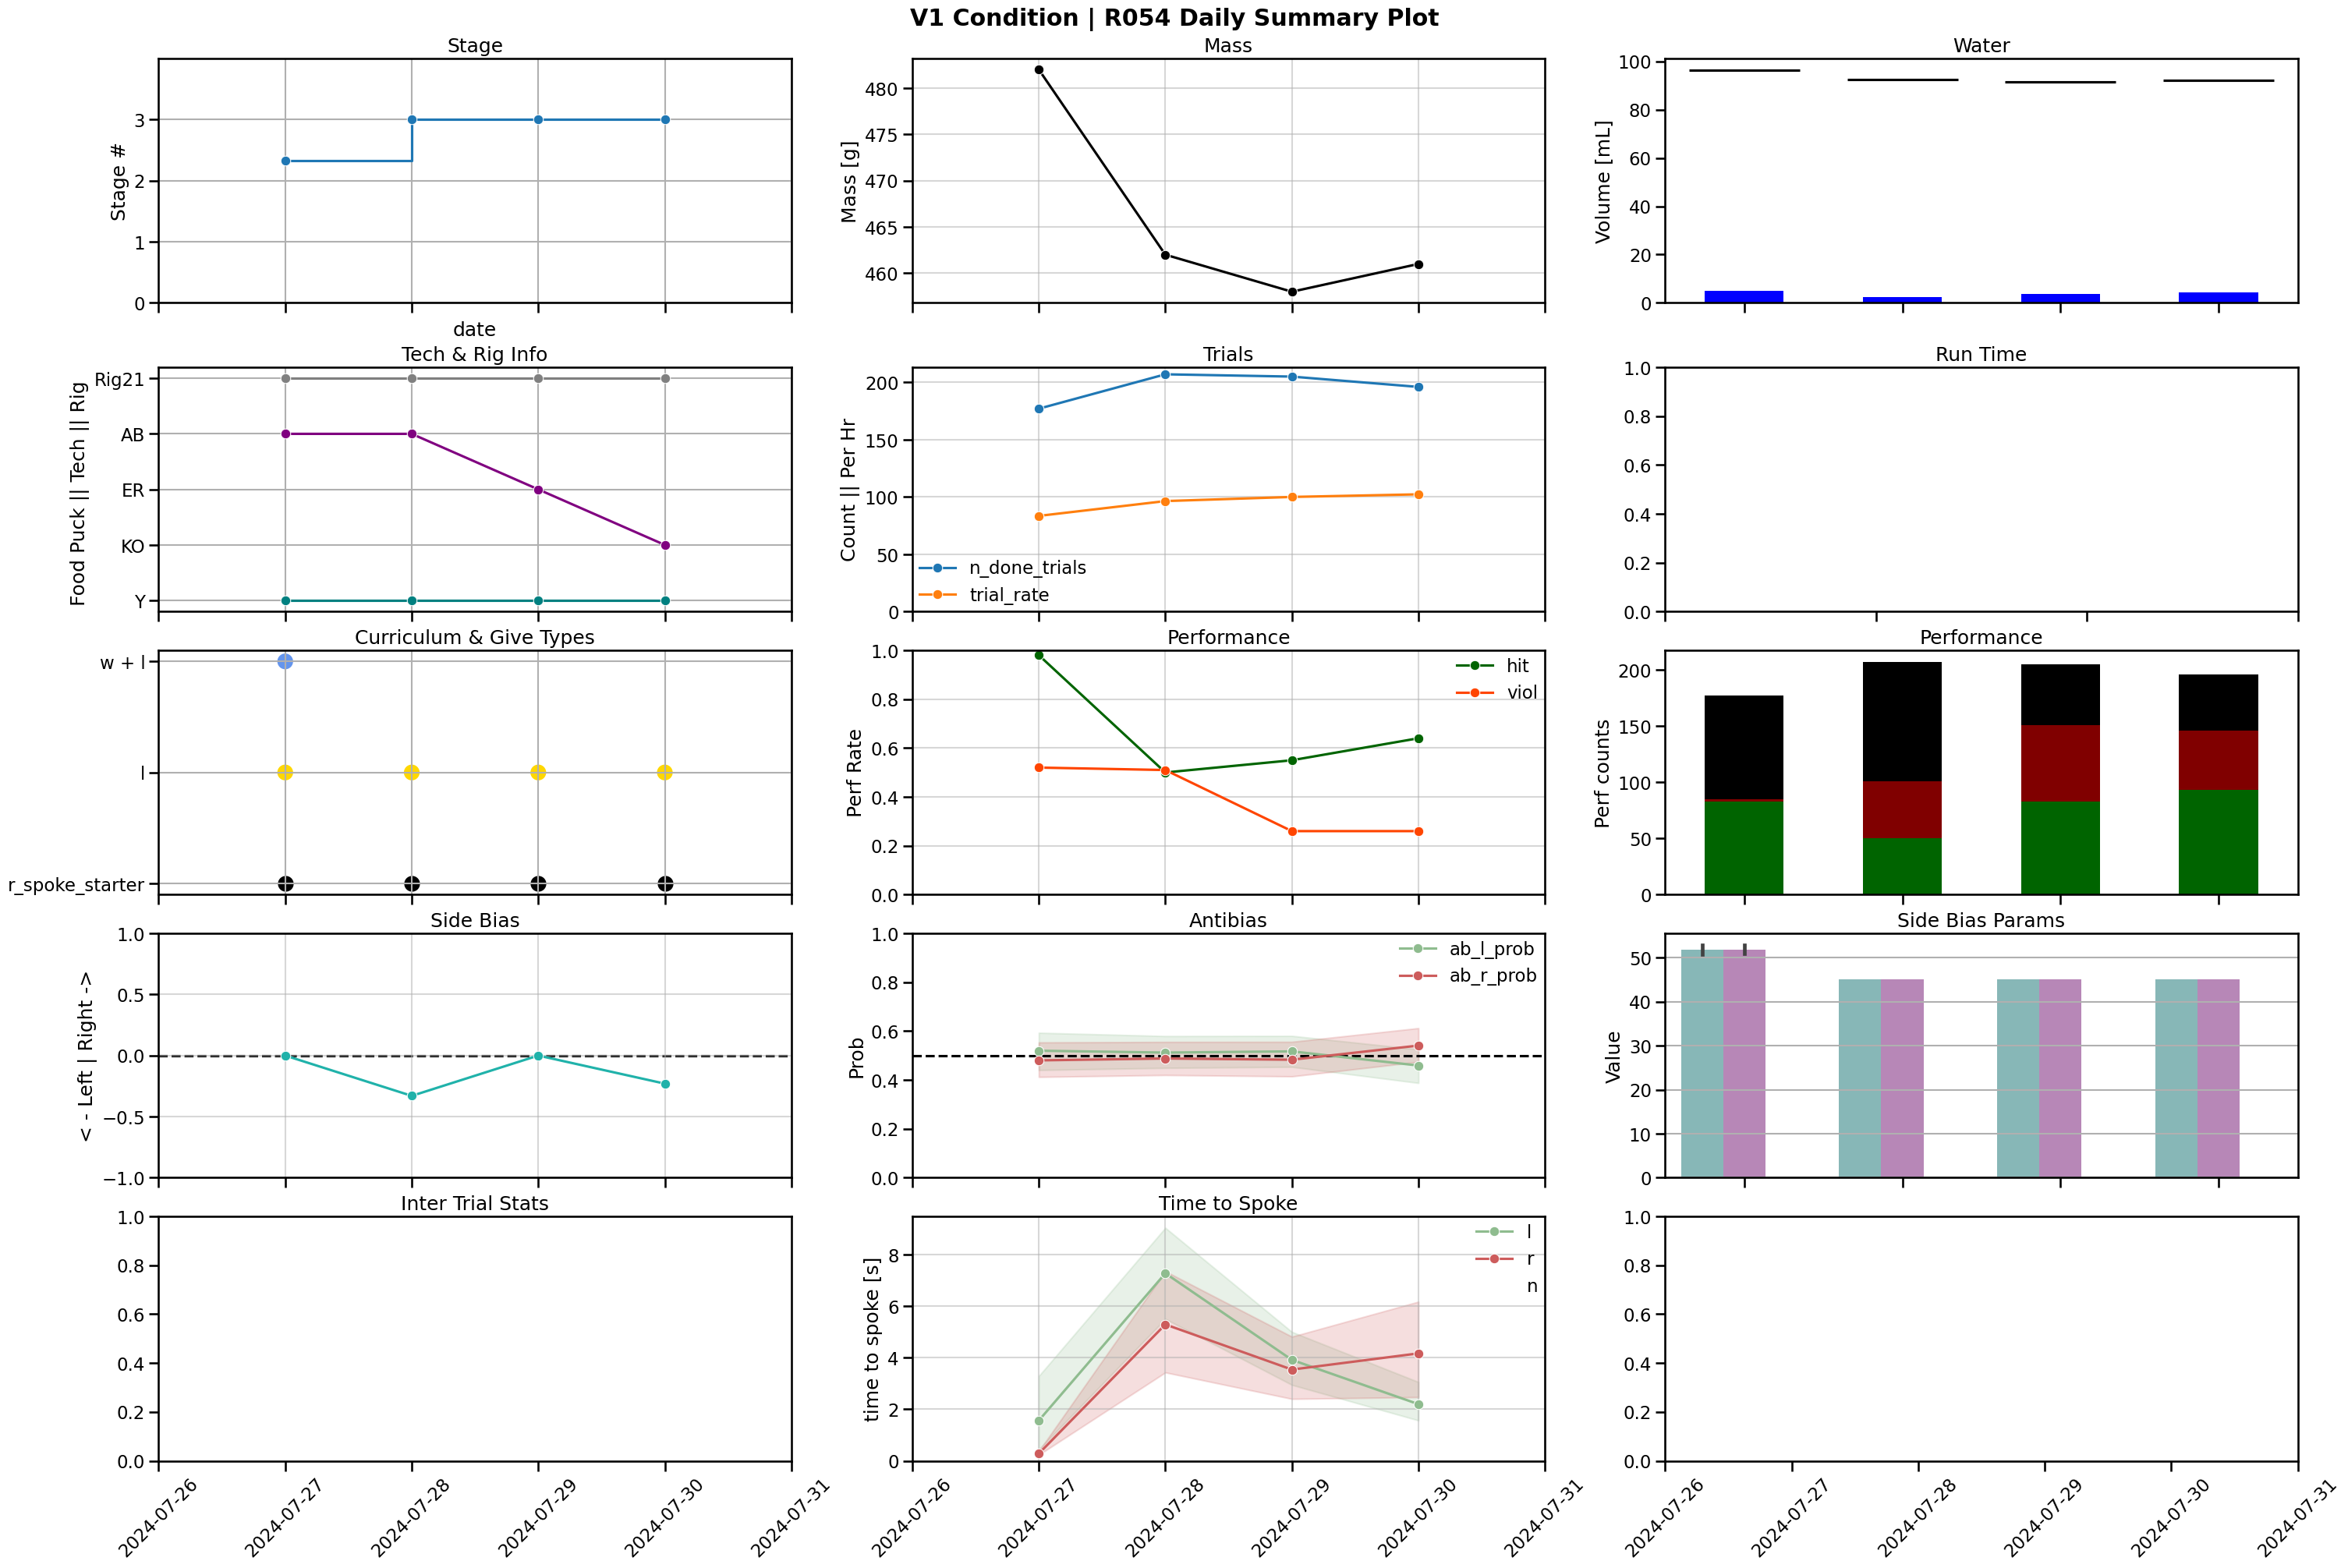

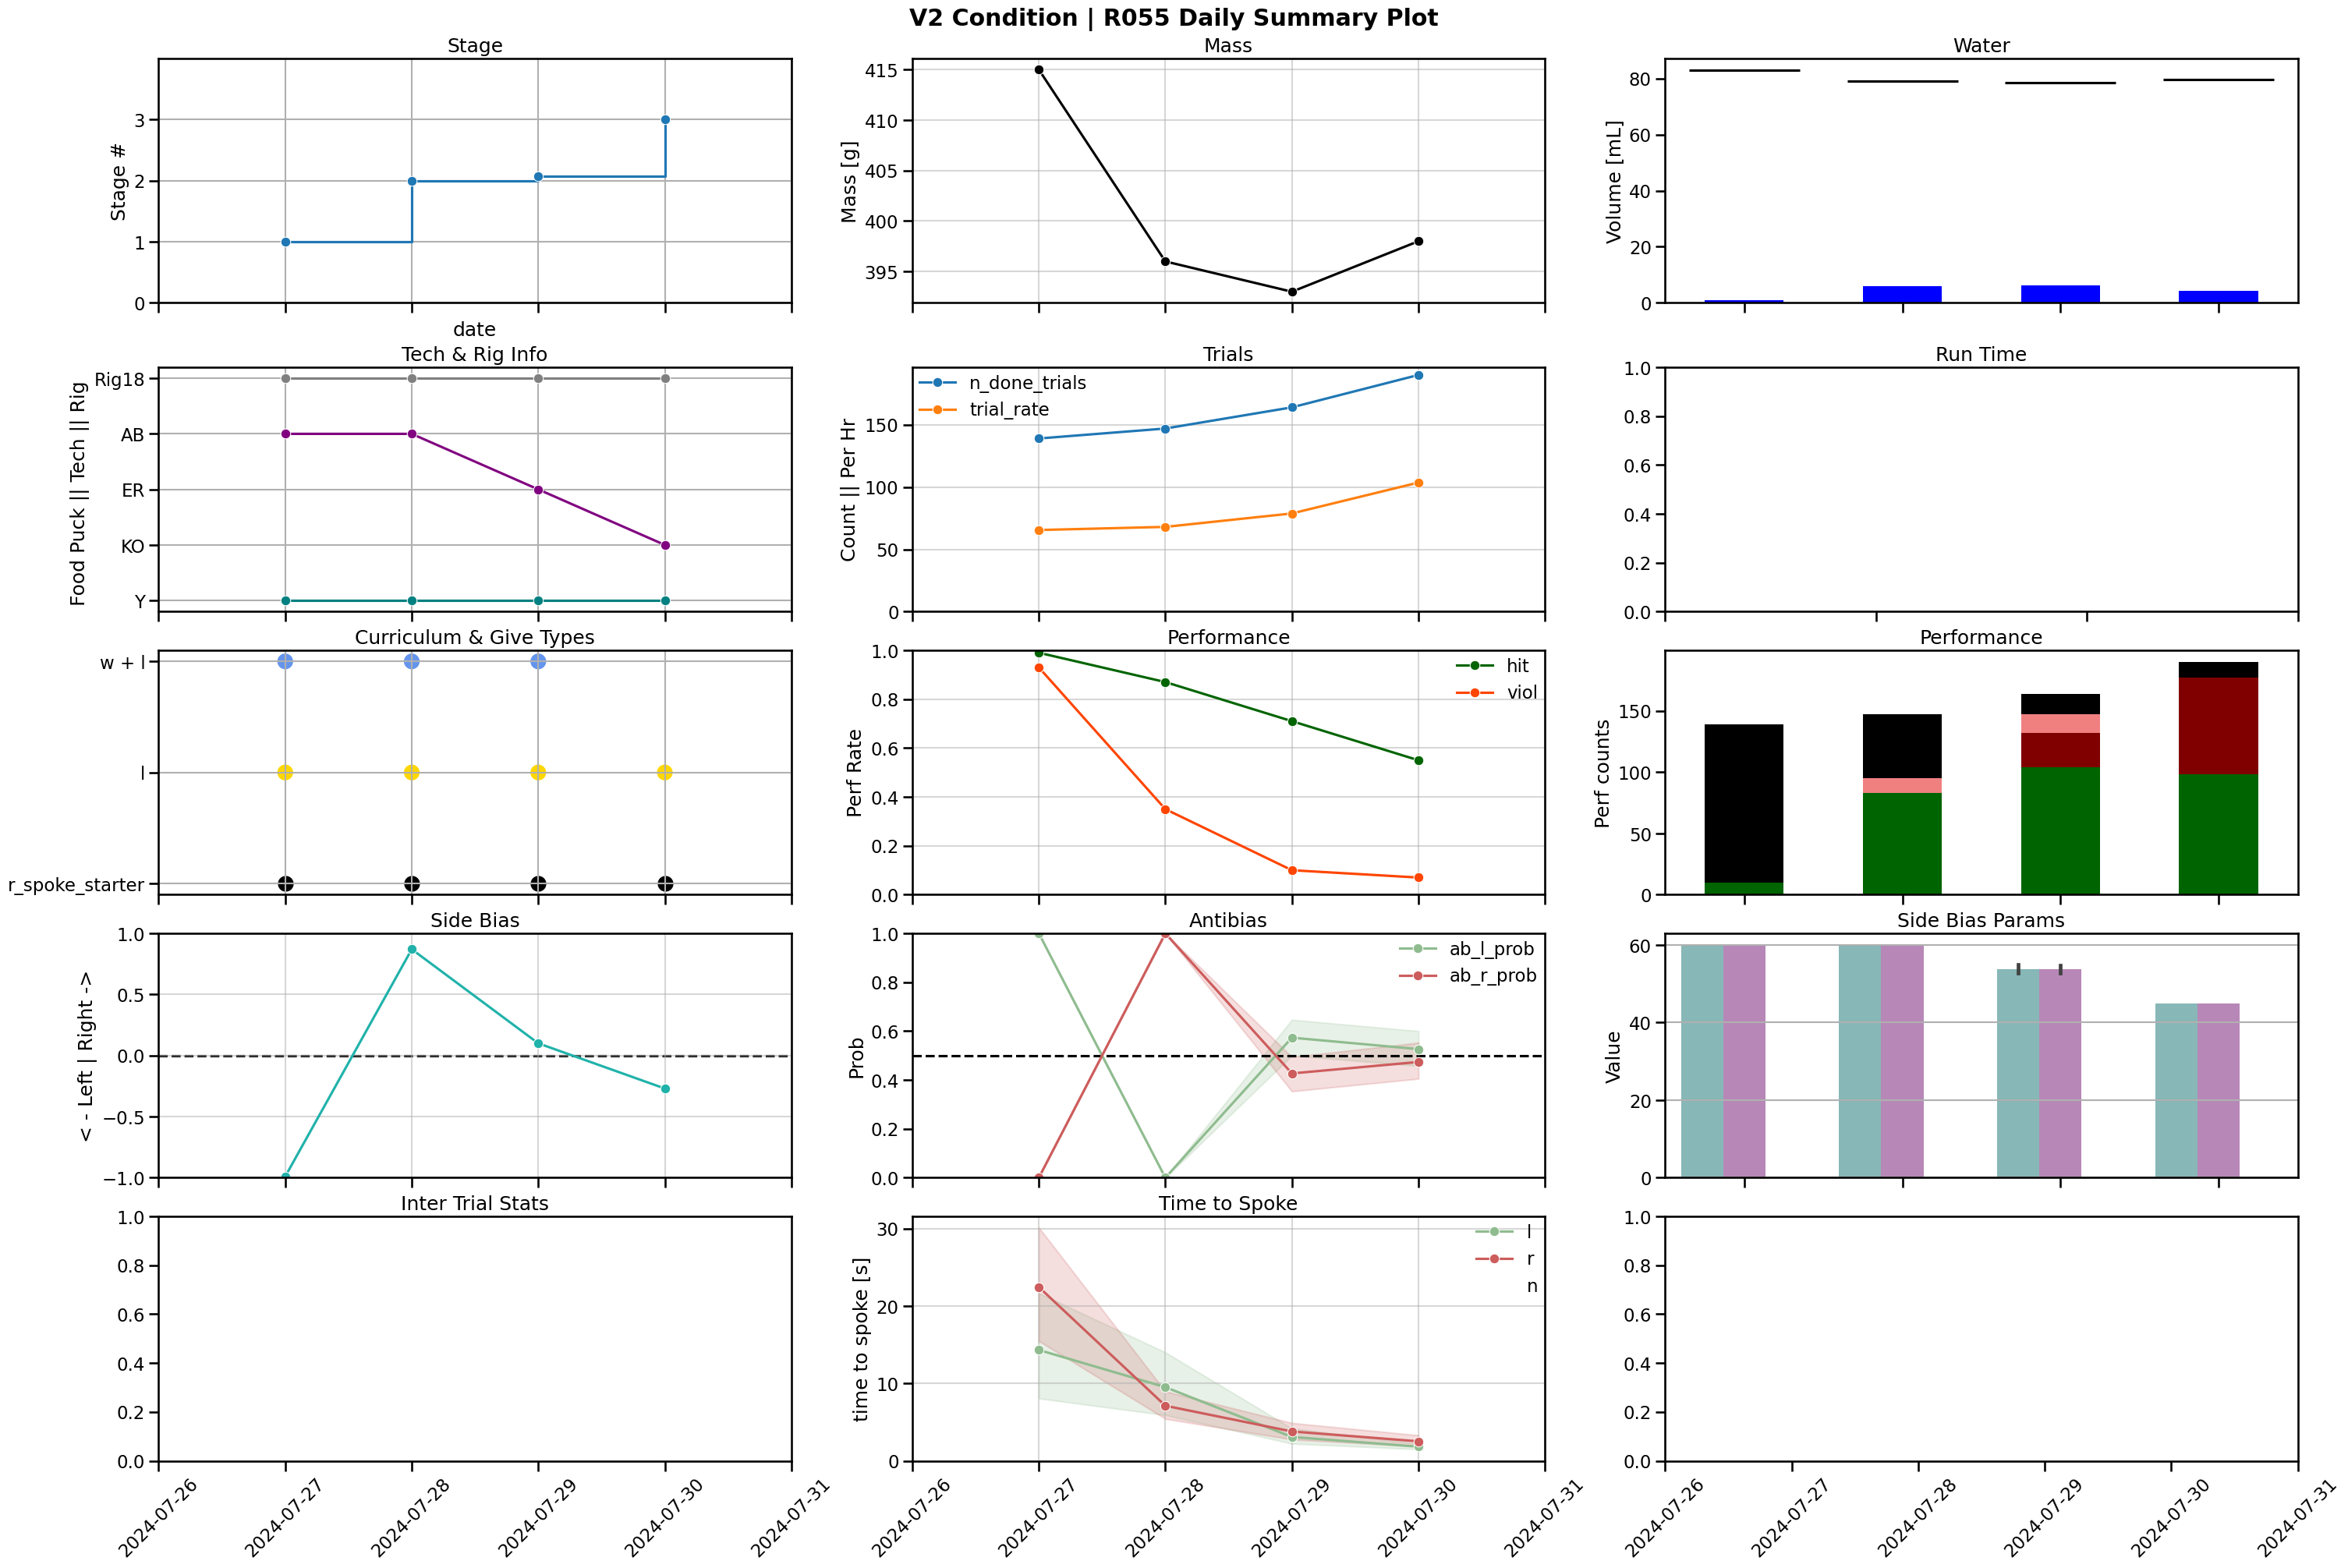

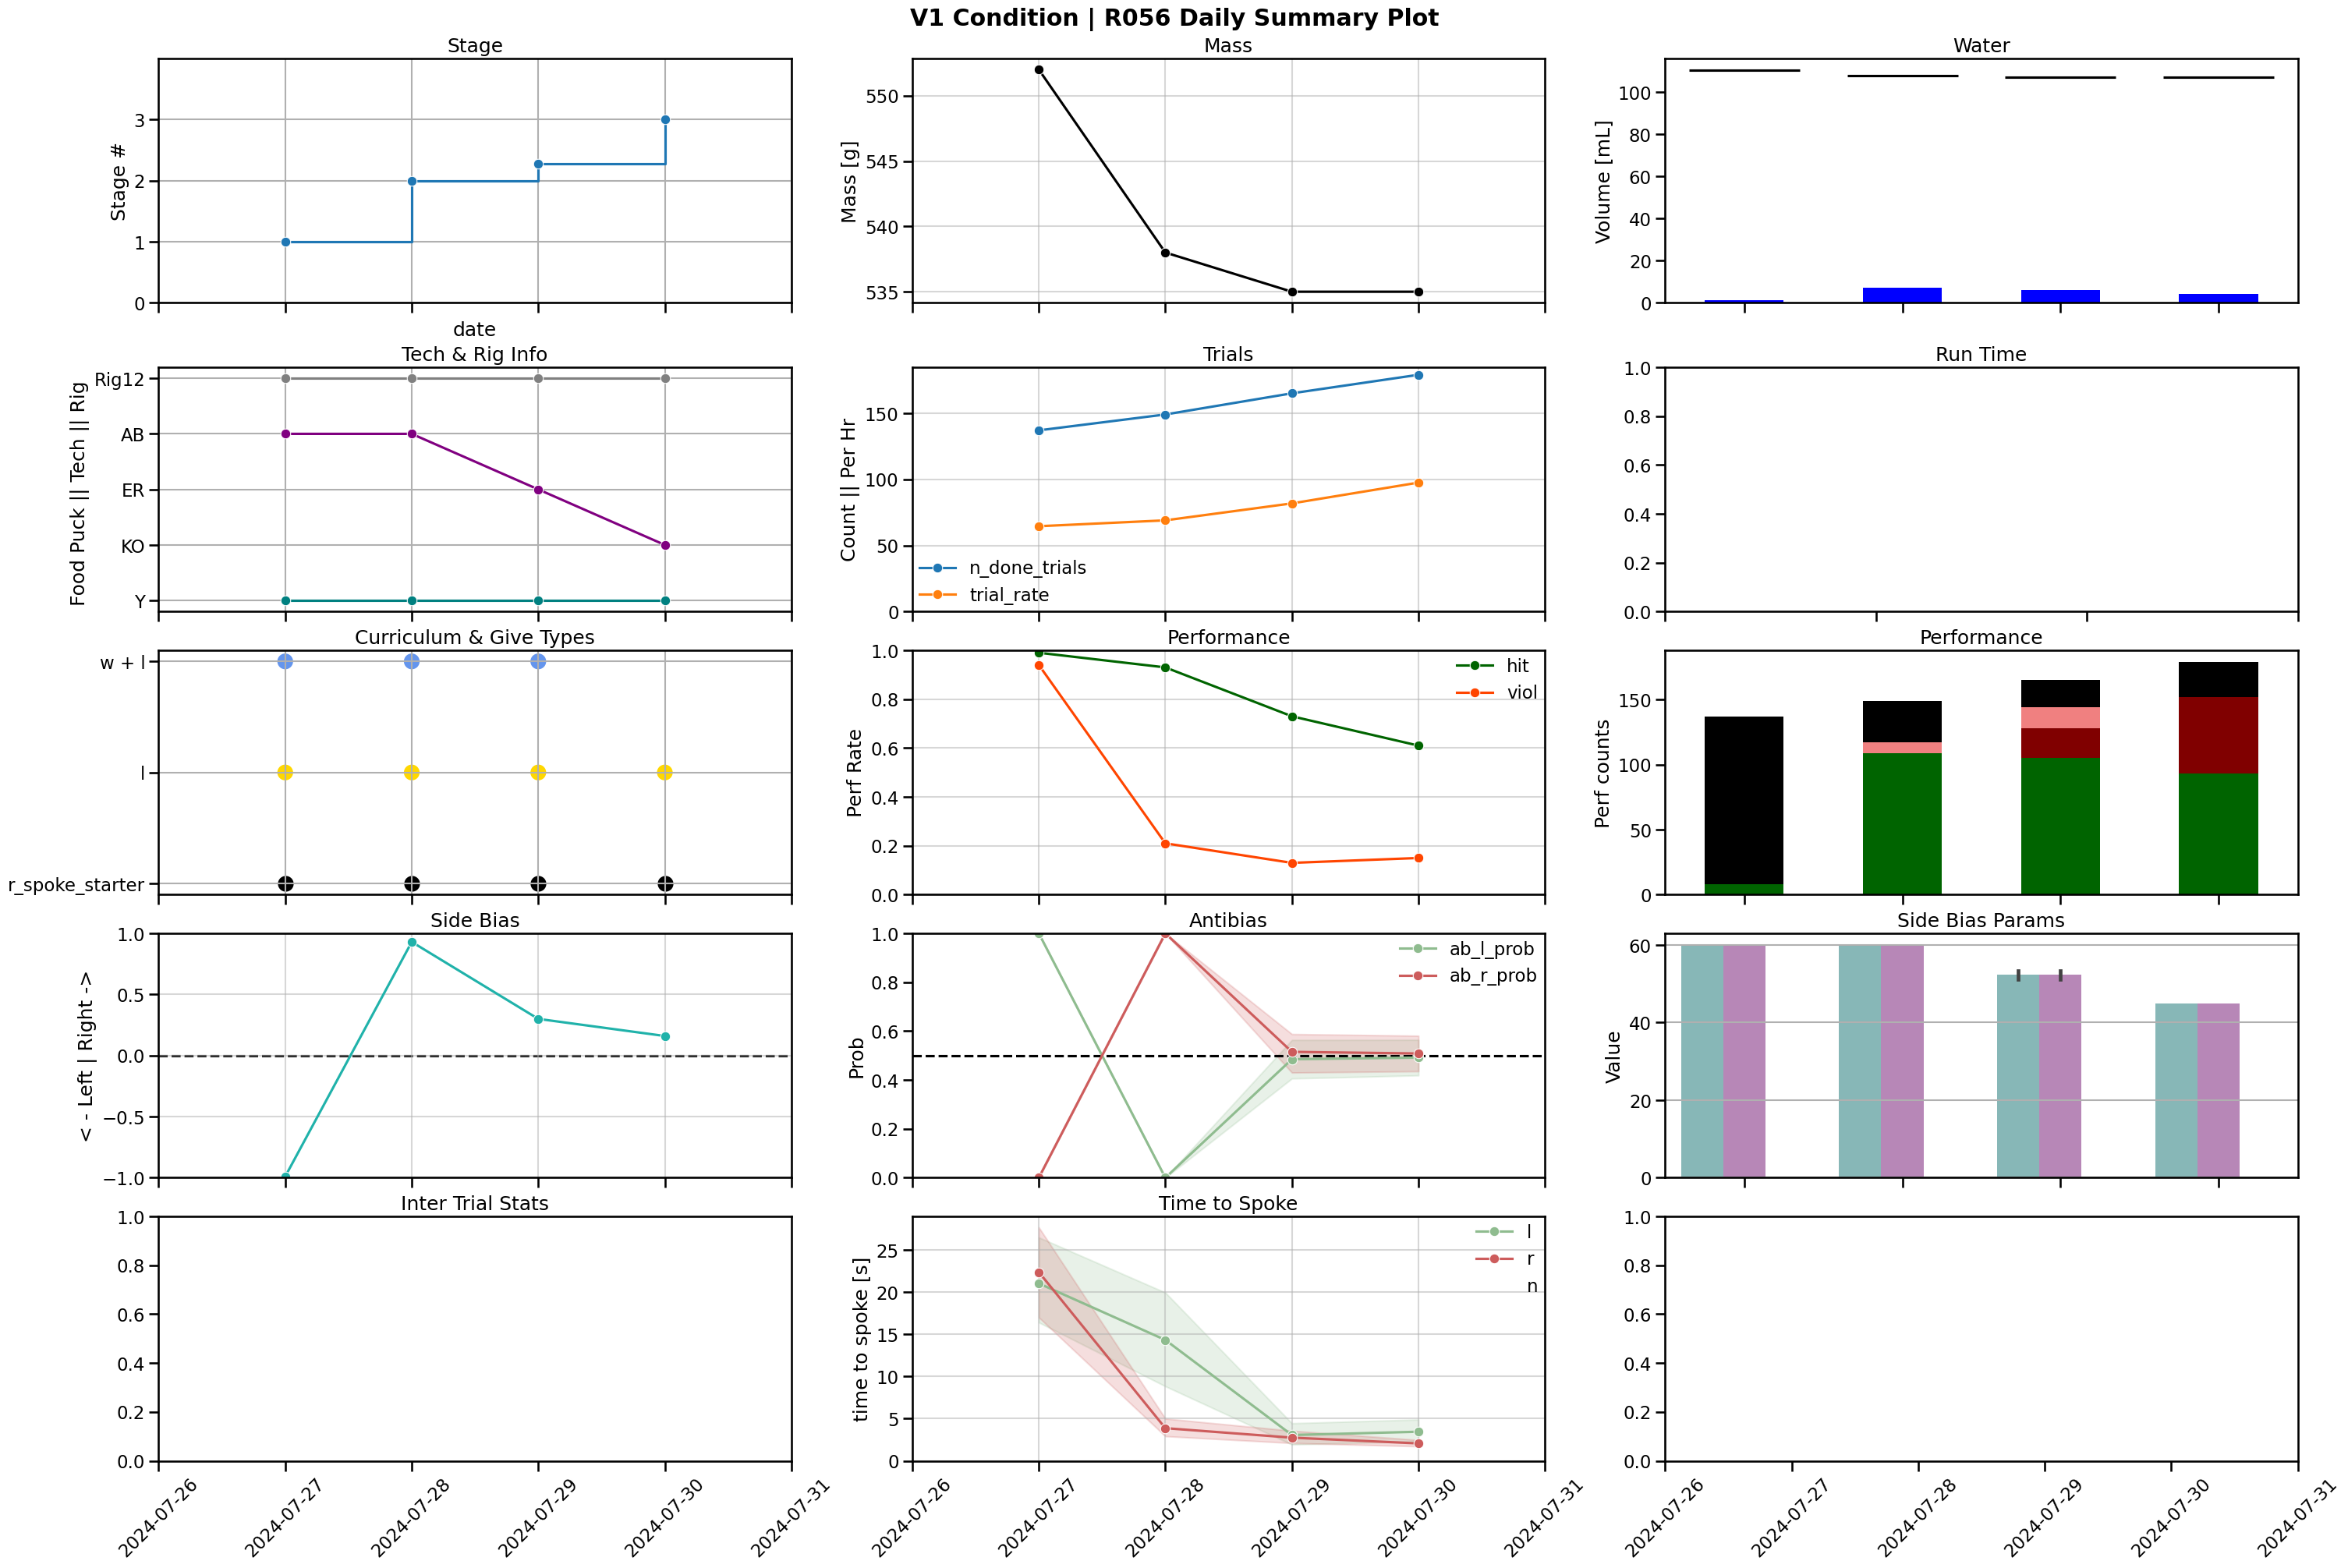

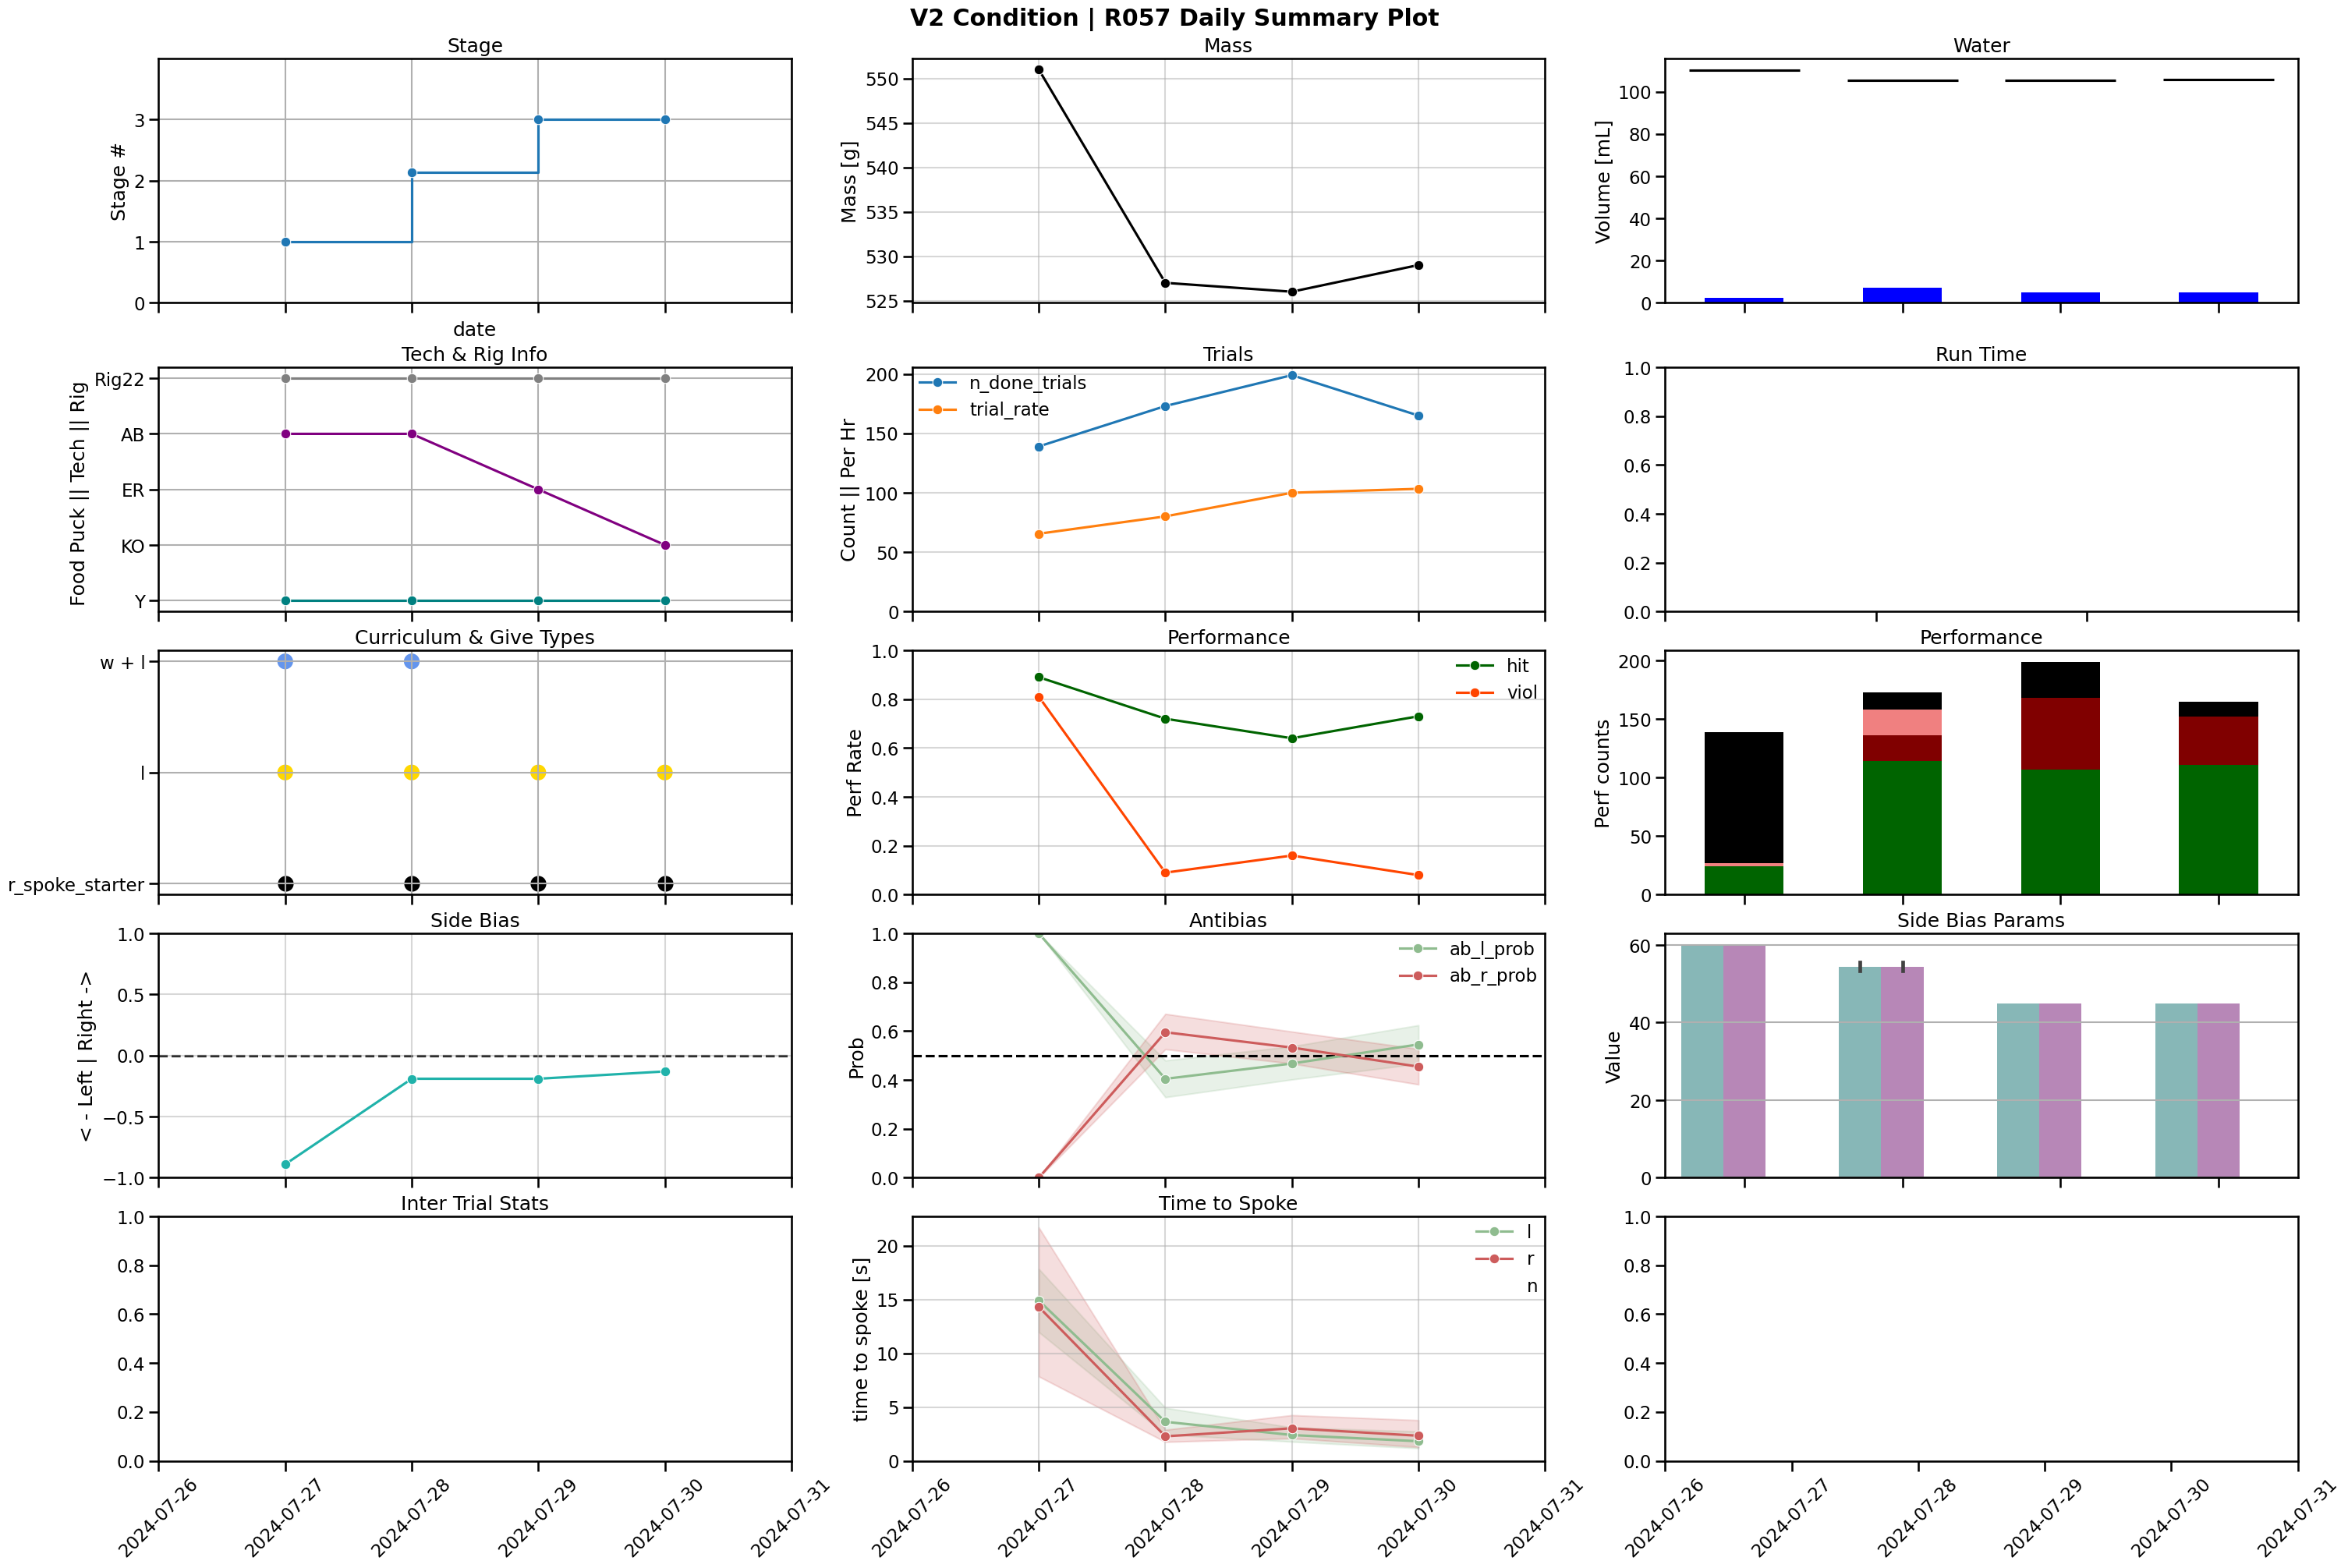

In [16]:
# ALPHA_2_SESSION_6 = set(ALPHA_2_ANIMALS) & set(ALPHA_SESSION_6)
for animal_id, animal_days_df in days_df.query("animal_id in @ALPHA_SESSION_7").groupby(
    "animal_id"
):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

## Session 6 animals Plot Within Day (Saved Out)

In [17]:
viz.summarize.single_day_summaries(
    trials_df.query("animal_id in @ALPHA_SESSION_7"),
    figures_path=FIGURES_PATH,
    save_out=True,
    overwrite=False,
)

making R052_2024-07-30_day_summary
making R053_2024-07-30_day_summary
making R054_2024-07-30_day_summary
making R055_2024-07-30_day_summary
making R056_2024-07-30_day_summary
making R057_2024-07-30_day_summary
